<h2><font color="#000000" size=6>Minería de datos</font></h2>
<h1><font color="#000000" size=5>PEC 4 - Random Forest</font></h1>
<br><br>
<div style="text-align: right">
<font color="#000000" size=3>Estudiante: Fernando H. Nasser-Eddine López</font><br>
<font color="#000000" size=3>Máster Universitario en Investigación en Inteligencia Artificial (MUIIA)</font><br>
<font color="#000000" size=3>Mayo 2025</font><br>
</div>

<h2><font color="#000000" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Fase de análisis de datos](#section1)
    * [1.1. Importación de librerías y carga de datos](#section11)
    * [1.2. Descripción del dataset seleccionado](#section12)
    * [1.3. Estadística descriptiva](#section13)
    * [1.4. Visualización exploratoria de los datos](#section14)
    * [1.5. Análisis de valores faltantes y atípicos](#section15)
    * [1.6. Análisis de distribuciones](#section16)
    * [1.7. Conclusiones del análisis exploratorio](#section17)

# <font color="#000000"> 1. Fase de análisis de datos</font><a id="section1"></a>

## <font color="#000000"> 1.1. Importación de librerías y carga de datos</font><a id="section11"></a>


En esta sección realizamos la importación de todas las librerías que utilizaremos a lo largo del análisis. Principalmente, usamos pandas para la manipulación de datos, matplotlib y seaborn para visualizaciones, así como scikit-learn para los algoritmos de aprendizaje automático y evaluación de modelos.

Cargamos el conjunto de datos Breast Cancer Wisconsin (Diagnostic) directamente desde scikit-learn, que proporciona una versión curada de este dataset. Transformamos los datos a formato DataFrame de pandas para facilitar su manipulación, y examinamos sus dimensiones y distribución de clases para comprender mejor su estructura. La **Tabla 1** muestra las primeras filas del dataset completo (incluidas variables objetivo):

In [1]:
# Importación de las librerías necesarias
import time
import warnings
import os

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, classification_report, roc_curve, auc)

# Modelos base
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

# Modelos ensemble
from sklearn.ensemble import (RandomForestClassifier, BaggingClassifier, 
                             ExtraTreesClassifier, AdaBoostClassifier)

# Explicabilidad
import shap

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

# Evitar warnings innecesarios
warnings.filterwarnings('ignore')

In [2]:
# Carga del dataset de cáncer de mama de Wisconsin
cancer = load_breast_cancer()

# Crear un DataFrame para una mejor manipulación de los datos
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')

# Asignar nombres a las clases para mejor interpretación
y_labels = y.map({0: 'maligno', 1: 'benigno'})

# Mostrar información básica del dataset
print(f"Dimensiones del dataset: {X.shape}")
print(f"\nDistribución de clases:")
print(y_labels.value_counts())
print(f"\nPorcentaje de clases:")
print(y_labels.value_counts(normalize=True).round(4) * 100)

# Crear un DataFrame completo con las características y las variables objetivo
X_completo = X.copy()
X_completo['target'] = y  # Variable numérica original
X_completo['diagnosis'] = y_labels  # Variable mapeada

# Configuración para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', None)        # No limitar el ancho de la salida

# Mostrar las primeras 5 filas del conjunto de datos completo
print("\nTabla 1.1 Primeras filas del dataset completo (incluidas variables objetivo):")
X_completo.head()

Dimensiones del dataset: (569, 30)

Distribución de clases:
target
benigno    357
maligno    212
Name: count, dtype: int64

Porcentaje de clases:
target
benigno    62.74
maligno    37.26
Name: proportion, dtype: float64

Tabla 1.1 Primeras filas del dataset completo (incluidas variables objetivo):


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  target diagnosis  
0                  0.11890       0   maligno  
1                  0.08902       0   maligno  
2                  0.08758       0   maligno  
3                  0.17300       0   maligno  
4                  0.07678       0   maligno

## <font color="#000000"> 1.2. Descripción del dataset seleccionado</font><a id="section12"></a>


Para la realización de esta práctica, hemos seleccionado el conjunto de datos "Breast Cancer Wisconsin (Diagnostic)" disponible en el repositorio UCI Machine Learning. Este dataset fue creado por el Dr. William H. Wolberg, W. Nick Street y Olvi L. Mangasarian en la Universidad de Wisconsin.

El dataset contiene características calculadas a partir de imágenes digitalizadas de aspirados con aguja fina (FNA) de masas mamarias. Estas características describen propiedades de los núcleos celulares presentes en las imágenes. El objetivo principal es la clasificación de los tumores en dos categorías: benignos (B) o malignos (M). (En scikit-learn, el target está codificado de manera que 0 representa tumores malignos y 1 representa tumores benignos. Creamos una nueva variable `y_labels` que convierte estos valores numéricos a las etiquetas ```benigno``` y ```maligno``` para facilitar la interpretación de los resultados.)

### Información general del dataset:

- **Número de instancias**: 569
- **Número de atributos**: 30 características numéricas (más el diagnóstico)
- **Atributo objetivo**: diagnóstico (M = maligno, B = benigno)
- **Distribución de clases**: 357 benignos (63%), 212 malignos (37%)

### Características del dataset:

Las características se calculan a partir de las imágenes digitalizadas y representan diversos aspectos de los núcleos celulares encontrados en los aspirados. Para cada imagen, se calculan diez características reales:

1. **Radio** (media de las distancias desde el centro a puntos del perímetro)
2. **Textura** (desviación estándar de los valores de escala de grises)
3. **Perímetro**
4. **Área**
5. **Suavidad** (variación local en longitudes de radio)
6. **Compacidad** (perímetro² / área - 1)
7. **Concavidad** (severidad de las porciones cóncavas del contorno)
8. **Puntos cóncavos** (número de porciones cóncavas del contorno)
9. **Simetría**
10. **Dimensión fractal** ("aproximación a la línea de costa" - 1)

Para cada uno de estos atributos, se registraron tres valores:
- Media
- Desviación estándar
- "Peor" o valor más grande (media de los tres valores más grandes)

Esto da como resultado 30 características en total para cada instancia (10 atributos × 3 medidas).

_**Nota 1**_: Este conjunto de datos es apropiado para aplicar técnicas de Random Forest debido a la naturaleza de sus características numéricas y su problema de clasificación binaria. Además, resulta interesante desde la perspectiva de la explicabilidad e interpretabilidad, ya que entender qué características son más determinantes para la clasificación puede tener implicaciones médicas relevantes en el diagnóstico temprano del cáncer de mama.


## <font color="#000000"> 1.3. Estadística descriptiva</font><a id="section13"></a>


Realizamos a continuación un análisis estadístico descriptivo de las características del dataset para comprender mejor la distribución y propiedades de las variables. En primer lugar calculamos y mostramos, en la **Tabla 2**, las estadísticas básicas como la **media**, **desviación estándar**, **valores mínimos y máximos**, **cuartiles**, **rango** y **coeficiente de variación** para todas las variables. Esto nos proporciona una primera aproximación a la dispersión y centralidad de cada característica.

In [3]:
# Obtener estadísticas descriptivas básicas
stats_desc = X.describe().T
stats_desc['rango'] = stats_desc['max'] - stats_desc['min']
stats_desc['coef_var'] = stats_desc['std'] / stats_desc['mean']

# Mostrar estadísticas descriptivas
print("Tabla 1.2. Estadísticas descriptivas de las variables numéricas:")
display(stats_desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'rango', 'coef_var']])

Tabla 1.2. Estadísticas descriptivas de las variables numéricas:


mean         std         min         25%  \
mean radius               14.127292    3.524049    6.981000   11.700000   
mean texture              19.289649    4.301036    9.710000   16.170000   
mean perimeter            91.969033   24.298981   43.790000   75.170000   
mean area                654.889104  351.914129  143.500000  420.300000   
mean smoothness            0.096360    0.014064    0.052630    0.086370   
mean compactness           0.104341    0.052813    0.019380    0.064920   
mean concavity             0.088799    0.079720    0.000000    0.029560   
mean concave points        0.048919    0.038803    0.000000    0.020310   
mean symmetry              0.181162    0.027414    0.106000    0.161900   
mean fractal dimension     0.062798    0.007060    0.049960    0.057700   
radius error               0.405172    0.277313    0.111500    0.232400   
texture error              1.216853    0.551648    0.360200    0.833900   
perimeter error            2.866059    2.021855    0.757000    1.606000   
area error                40.337079   45.491006    6.802000   17.850000   
smoothness error           0.007041    0.003003    0.001713    0.005169   
compactness error          0.025478    0.017908    0.002252    0.013080   
concavity error            0.031894    0.030186    0.000000    0.015090   
concave points error       0.011796    0.006170    0.000000    0.007638   
symmetry error             0.020542    0.008266    0.007882    0.015160   
fractal dimension error    0.003795    0.002646    0.000895    0.002248   
worst radius              16.269190    4.833242    7.930000   13.010000   
worst texture             25.677223    6.146258   12.020000   21.080000   
worst perimeter          107.261213   33.602542   50.410000   84.110000   
worst area               880.583128  569.356993  185.200000  515.300000   
worst smoothness           0.132369    0.022832    0.071170    0.116600   
worst compactness          0.254265    0.157336    0.027290    0.147200   
worst concavity            0.272188    0.208624    0.000000    0.114500   
worst concave points       0.114606    0.065732    0.000000    0.064930   
worst symmetry             0.290076    0.061867    0.156500    0.250400   
worst fractal dimension    0.083946    0.018061    0.055040    0.071460   

                                50%          75%         max        rango  \
mean radius               13.370000    15.780000    28.11000    21.129000   
mean texture              18.840000    21.800000    39.28000    29.570000   
mean perimeter            86.240000   104.100000   188.50000   144.710000   
mean area                551.100000   782.700000  2501.00000  2357.500000   
mean smoothness            0.095870     0.105300     0.16340     0.110770   
mean compactness           0.092630     0.130400     0.34540     0.326020   
mean concavity             0.061540     0.130700     0.42680     0.426800   
mean concave points        0.033500     0.074000     0.20120     0.201200   
mean symmetry              0.179200     0.195700     0.30400     0.198000   
mean fractal dimension     0.061540     0.066120     0.09744     0.047480   
radius error               0.324200     0.478900     2.87300     2.761500   
texture error              1.108000     1.474000     4.88500     4.524800   
perimeter error            2.287000     3.357000    21.98000    21.223000   
area error                24.530000    45.190000   542.20000   535.398000   
smoothness error           0.006380     0.008146     0.03113     0.029417   
compactness error          0.020450     0.032450     0.13540     0.133148   
concavity error            0.025890     0.042050     0.39600     0.396000   
concave points error       0.010930     0.014710     0.05279     0.052790   
symmetry error             0.018730     0.023480     0.07895     0.071068   
fractal dimension error    0.003187     0.004558     0.02984     0.028945   
worst radius              14.970000    18.790000    36.04000    28.110000   
worst textu



Posteriormente, analizamos los valores promedio de cada variable según la clase (benigno o maligno) para identificar aquellas características que muestran mayores diferencias entre grupos (**Tabla 1.3**). Para cuantificar estas diferencias, calculamos la diferencia relativa entre las medias de ambas clases para cada característica, lo que nos permite identificar aquellas con mayor poder discriminativo. La **Figura 1.1** muestra estas características ordenadas de mayor a menor diferencia realtiva entre clases.


Tabla 1.3. Valores promedio para cada clase:


target                      benigno      maligno
mean radius               12.146524    17.462830
mean texture              17.914762    21.604906
mean perimeter            78.075406   115.365377
mean area                462.790196   978.376415
mean smoothness            0.092478     0.102898
mean compactness           0.080085     0.145188
mean concavity             0.046058     0.160775
mean concave points        0.025717     0.087990
mean symmetry              0.174186     0.192909
mean fractal dimension     0.062867     0.062680
radius error               0.284082     0.609083
texture error              1.220380     1.210915
perimeter error            2.000321     4.323929
area error                21.135148    72.672406
smoothness error           0.007196     0.006780
compactness error          0.021438     0.032281
concavity error            0.025997     0.041824
concave points error       0.009858     0.015060
symmetry error             0.020584     0.020472
fractal dimension error    0.003636     0.004062
worst radius              13.379801    21.134811
worst texture             23.515070    29.318208
worst perimeter           87.005938   141.370330
worst area               558.899440  1422.286321
worst smoothness           0.124959     0.144845
worst compactness          0.182673     0.374824
worst concavity            0.166238     0.450606
worst concave points       0.074444     0.182237
worst symmetry             0.270246     0.323468
worst fractal dimension    0.079442     0.091530

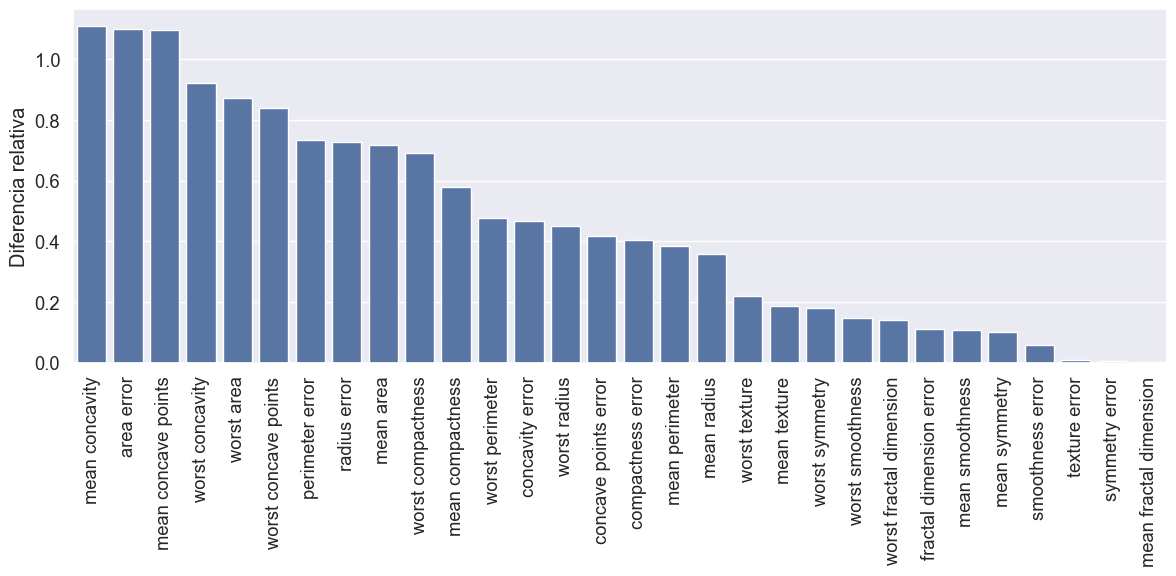

In [4]:
# Análisis de las características por clase
print("\nTabla 1.3. Valores promedio para cada clase:")
class_means = X.join(y_labels).groupby('target').mean()
display(class_means.T)

# Calculamos la diferencia relativa entre clases para cada característica
relative_diff = (abs(class_means.iloc[0] - class_means.iloc[1]) / ((class_means.iloc[0] + class_means.iloc[1])/2))
relative_sort_diff = relative_diff.sort_values(ascending=False)

# Crear directorio para guardar las imágenes si no existe
output_dir = 'results/analisis'
os.makedirs(output_dir, exist_ok=True)

# Visualizamos las características con mayor diferencia entre clases
plt.figure(figsize=(12, 6))
sns.barplot(x=relative_sort_diff.index, y=relative_sort_diff.values)
#plt.title('Figura 1.1 Características ordenadas de mayor a menor diferencia relativa entre clases')
plt.ylabel('Diferencia relativa')
plt.xlabel('')
plt.xticks(rotation=90)
plt.tight_layout()

# Guardar la figura en el directorio especificado
plt.savefig(f'{output_dir}/diferencias_relativas.png', dpi=100, bbox_inches='tight')
plt.show()



Finalmente, en la **Tabla 1.4**, examinamos en detalle las cinco características con mayor diferencia entre clases, analizando sus estadísticas por grupo para comprender mejor su comportamiento. Esta información es importante para la selección de características en las etapas posteriores del análisis.

In [5]:
# Estadísticas por grupo para las 5 características con mayor diferencia
top5_features = relative_sort_diff.index[:5].tolist()
group_stats = X[top5_features].join(y_labels).groupby('target').agg(['mean', 'median', 'std', 'min', 'max'])
print("\nTabla 1.4. Estadísticas por grupo de las 5 características con mayor diferencia:")
display(group_stats)


Tabla 1.4. Estadísticas por grupo de las 5 características con mayor diferencia:


mean concavity                                     area error          \
                  mean   median       std      min     max       mean  median   
target                                                                          
benigno       0.046058  0.03709  0.043442  0.00000  0.4108  21.135148  19.630   
maligno       0.160775  0.15135  0.075019  0.02398  0.4268  72.672406  58.455   

                                   mean concave points                     \
               std     min     max                mean   median       std   
target                                                                      
benigno   8.843472   6.802   77.11            0.025717  0.02344  0.015909   
maligno  61.355268  13.990  542.20            0.087990  0.08628  0.034374   

                          worst concavity                                    \
             min      max            mean  median       std      min    max   
target                                                                        
benigno  0.00000  0.08534        0.166238  0.1412  0.140368  0.00000  1.252   
maligno  0.02031  0.20120        0.450606  0.4049  0.181507  0.02398  1.170   

          worst area                                     
                mean  median         std    min     max  
target                                                   
benigno   558.899440   547.4  163.601424  185.2  1210.0  
maligno  1422.286321  1303.0  597.967743  508.1  4254.0

## <font color="#000000"> 1.4. Visualización exploratoria de los datos</font><a id="section14"></a>


La visualización de datos nos permite obtener una comprensión más intuitiva de las relaciones entre variables y patrones que podrían no ser evidentes en las estadísticas descriptivas. a continuación, presentamos diversas visualizaciones para explorar la distribución de características y su relación con la variable objetivo.

La **figura 1.2** muestra un gráfico de barras con la distribución de las clases en el conjunto de datos, lo que nos permite confirmar visualmente si existe un desbalance significativo entre categorías.

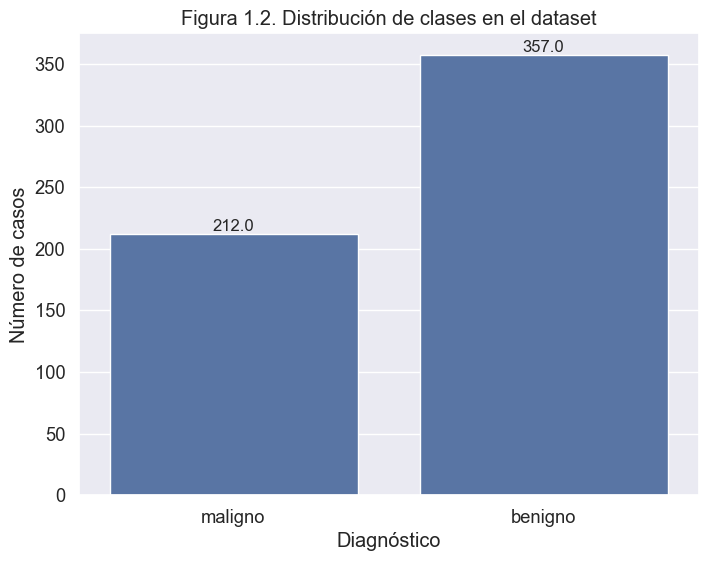

In [6]:
# Visualizar la distribución de clases
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_labels)
plt.title('Figura 1.2. Distribución de clases en el dataset')
plt.xlabel('Diagnóstico')
plt.ylabel('Número de casos')

# Añadir etiquetas con los valores exactos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=12)

plt.savefig(f'{output_dir}/distri_de_clases.png', dpi=100, bbox_inches='tight')
plt.show()


Posteriormente en las **Figuras 1.3, 1.4 y 1.5** mostramos los histogramas segmentados por clase y ordenados por diferencias relativas. Estos gráficos nos permiten observar cómo se distribuyen los valores de cada característica según el diagnóstico (benigno o maligno). En las gráficas se aprecia que donde hay más clara separación de variables Grupos 1 y 2, los valores de las variables para el cáncer maligno son superiores.

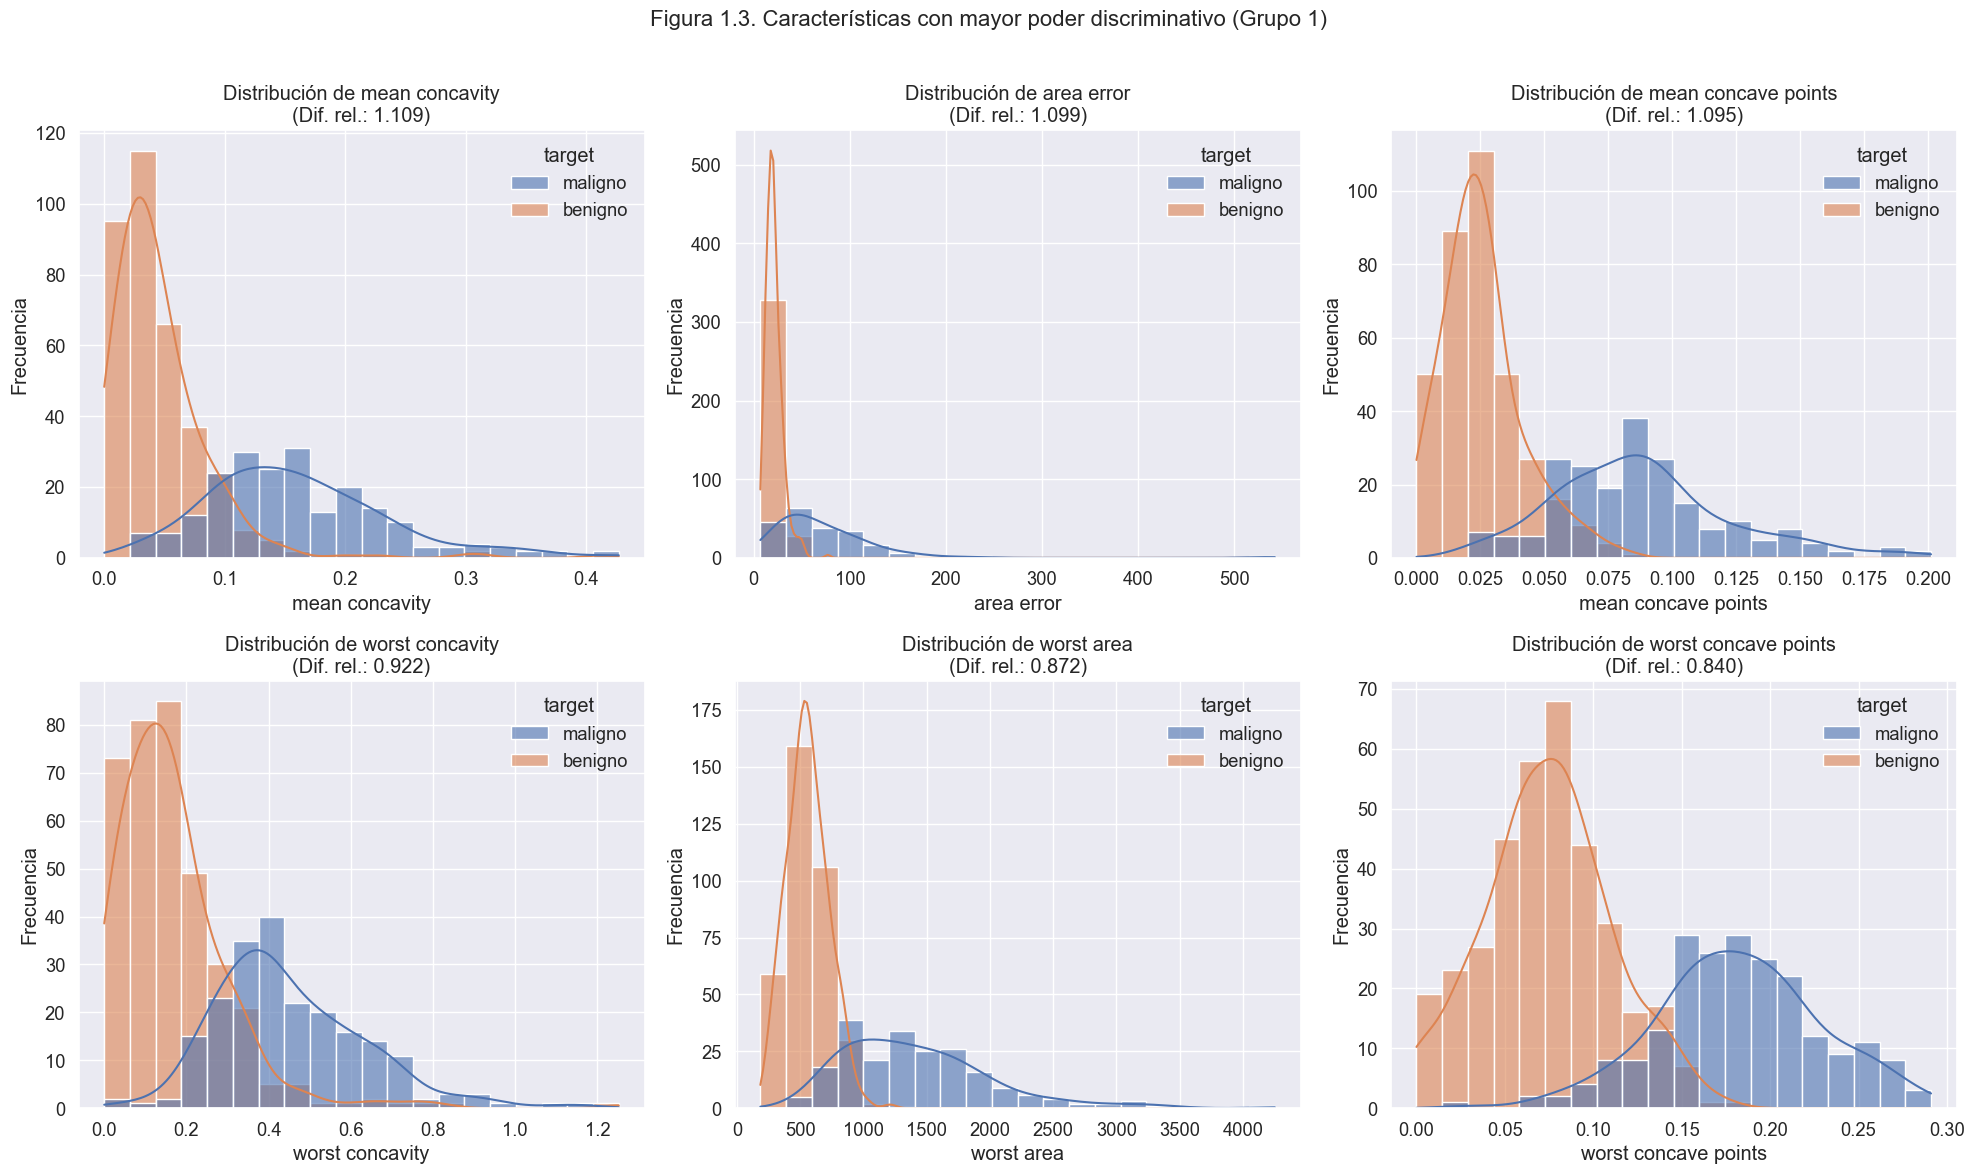

Grupo 1: características 1-6 (de 30)


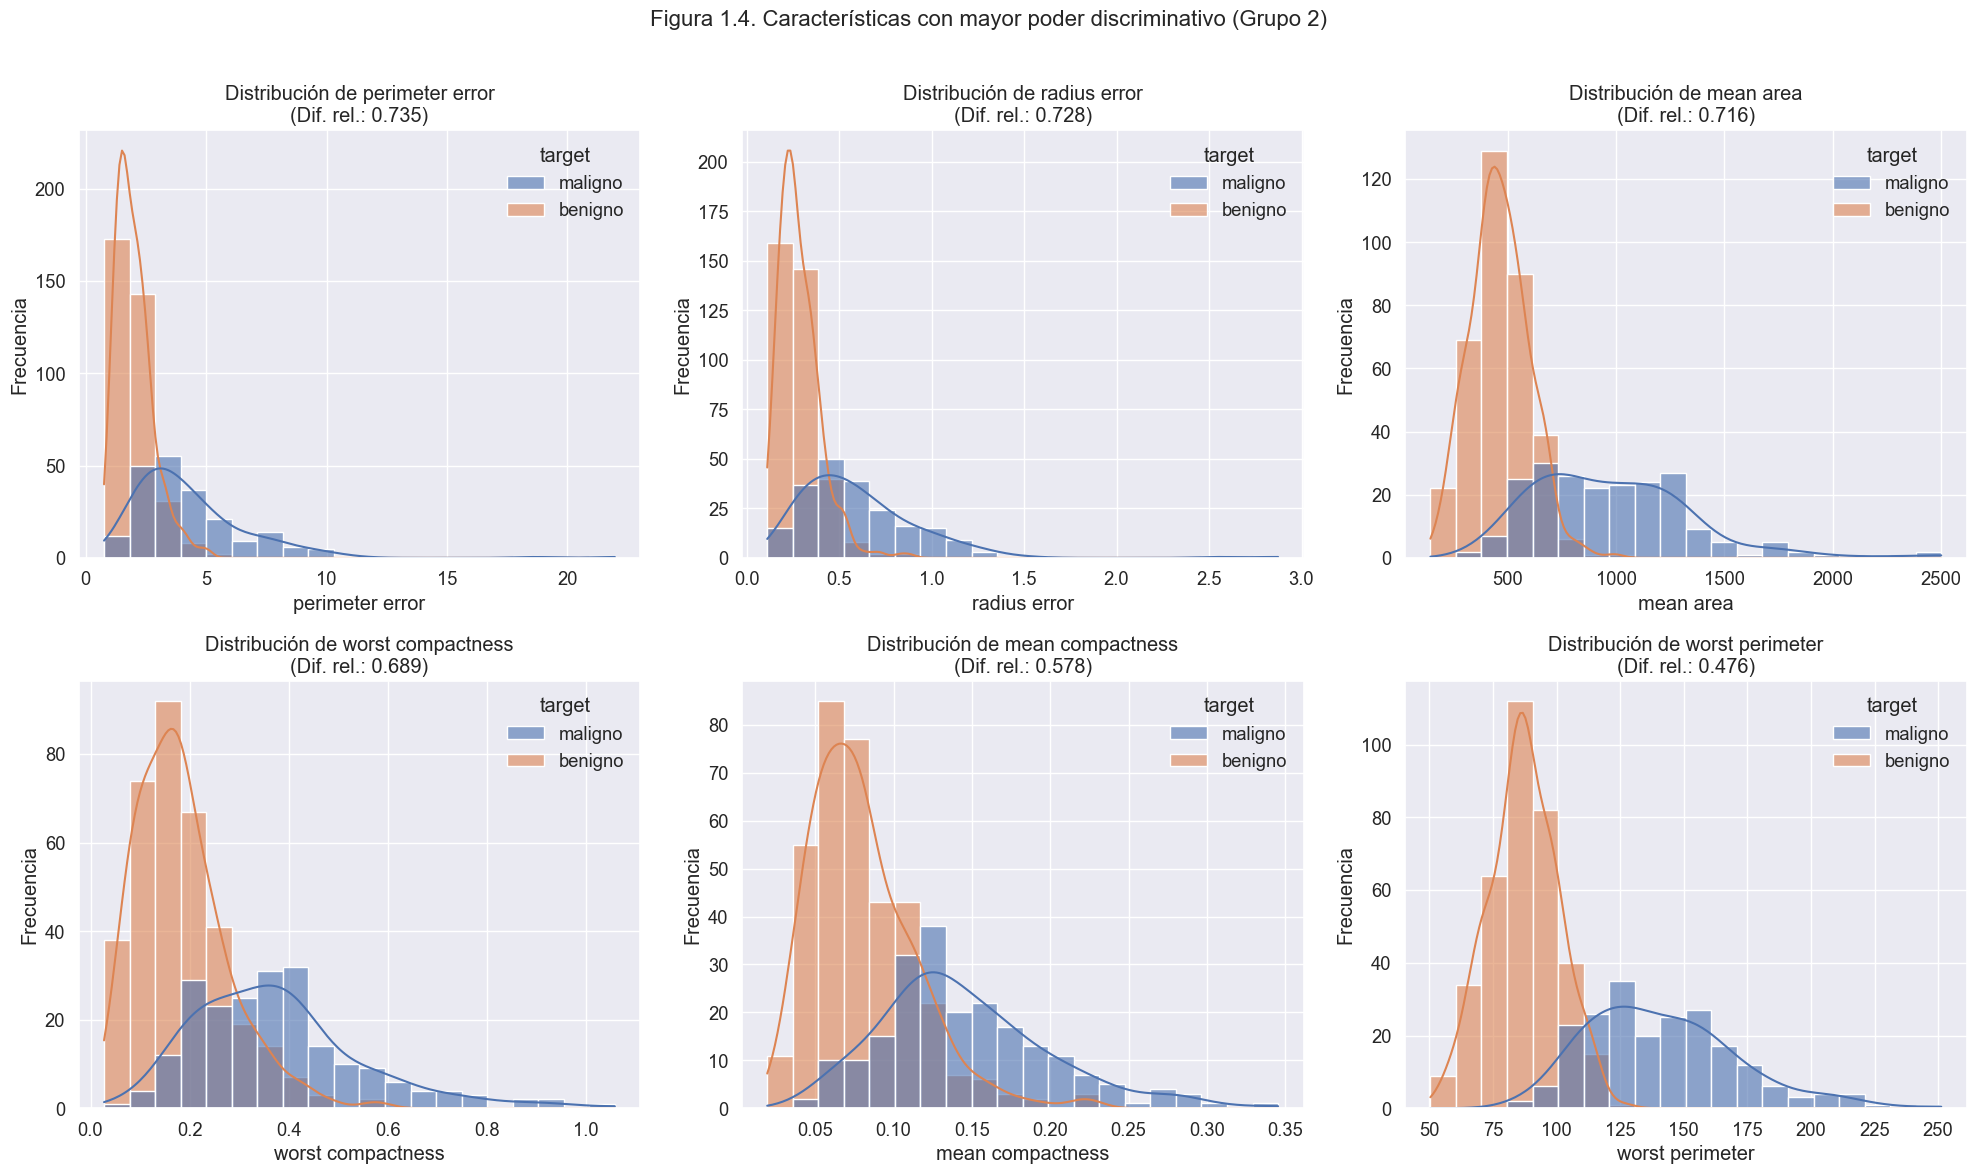

Grupo 2: características 7-12 (de 30)


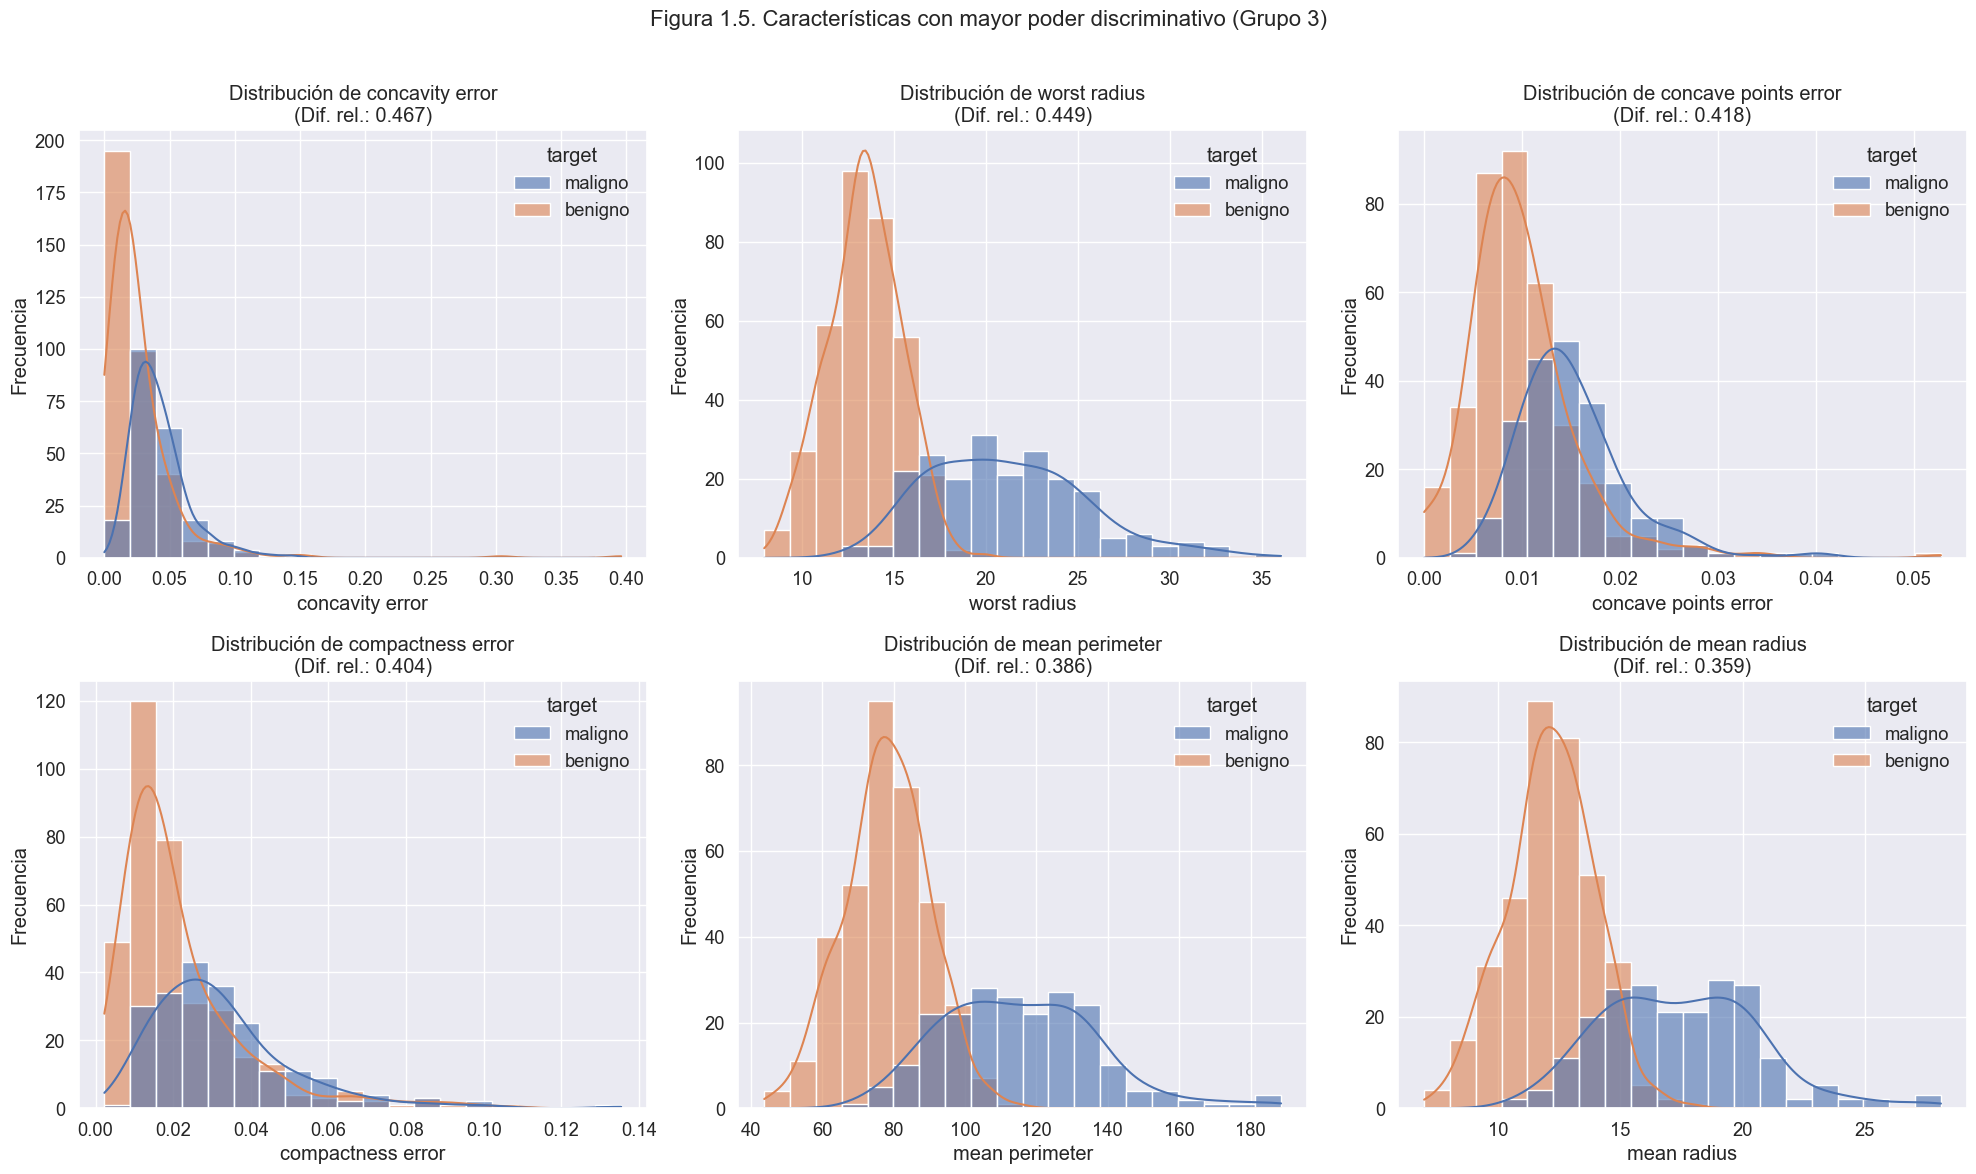

Grupo 3: características 13-18 (de 30)


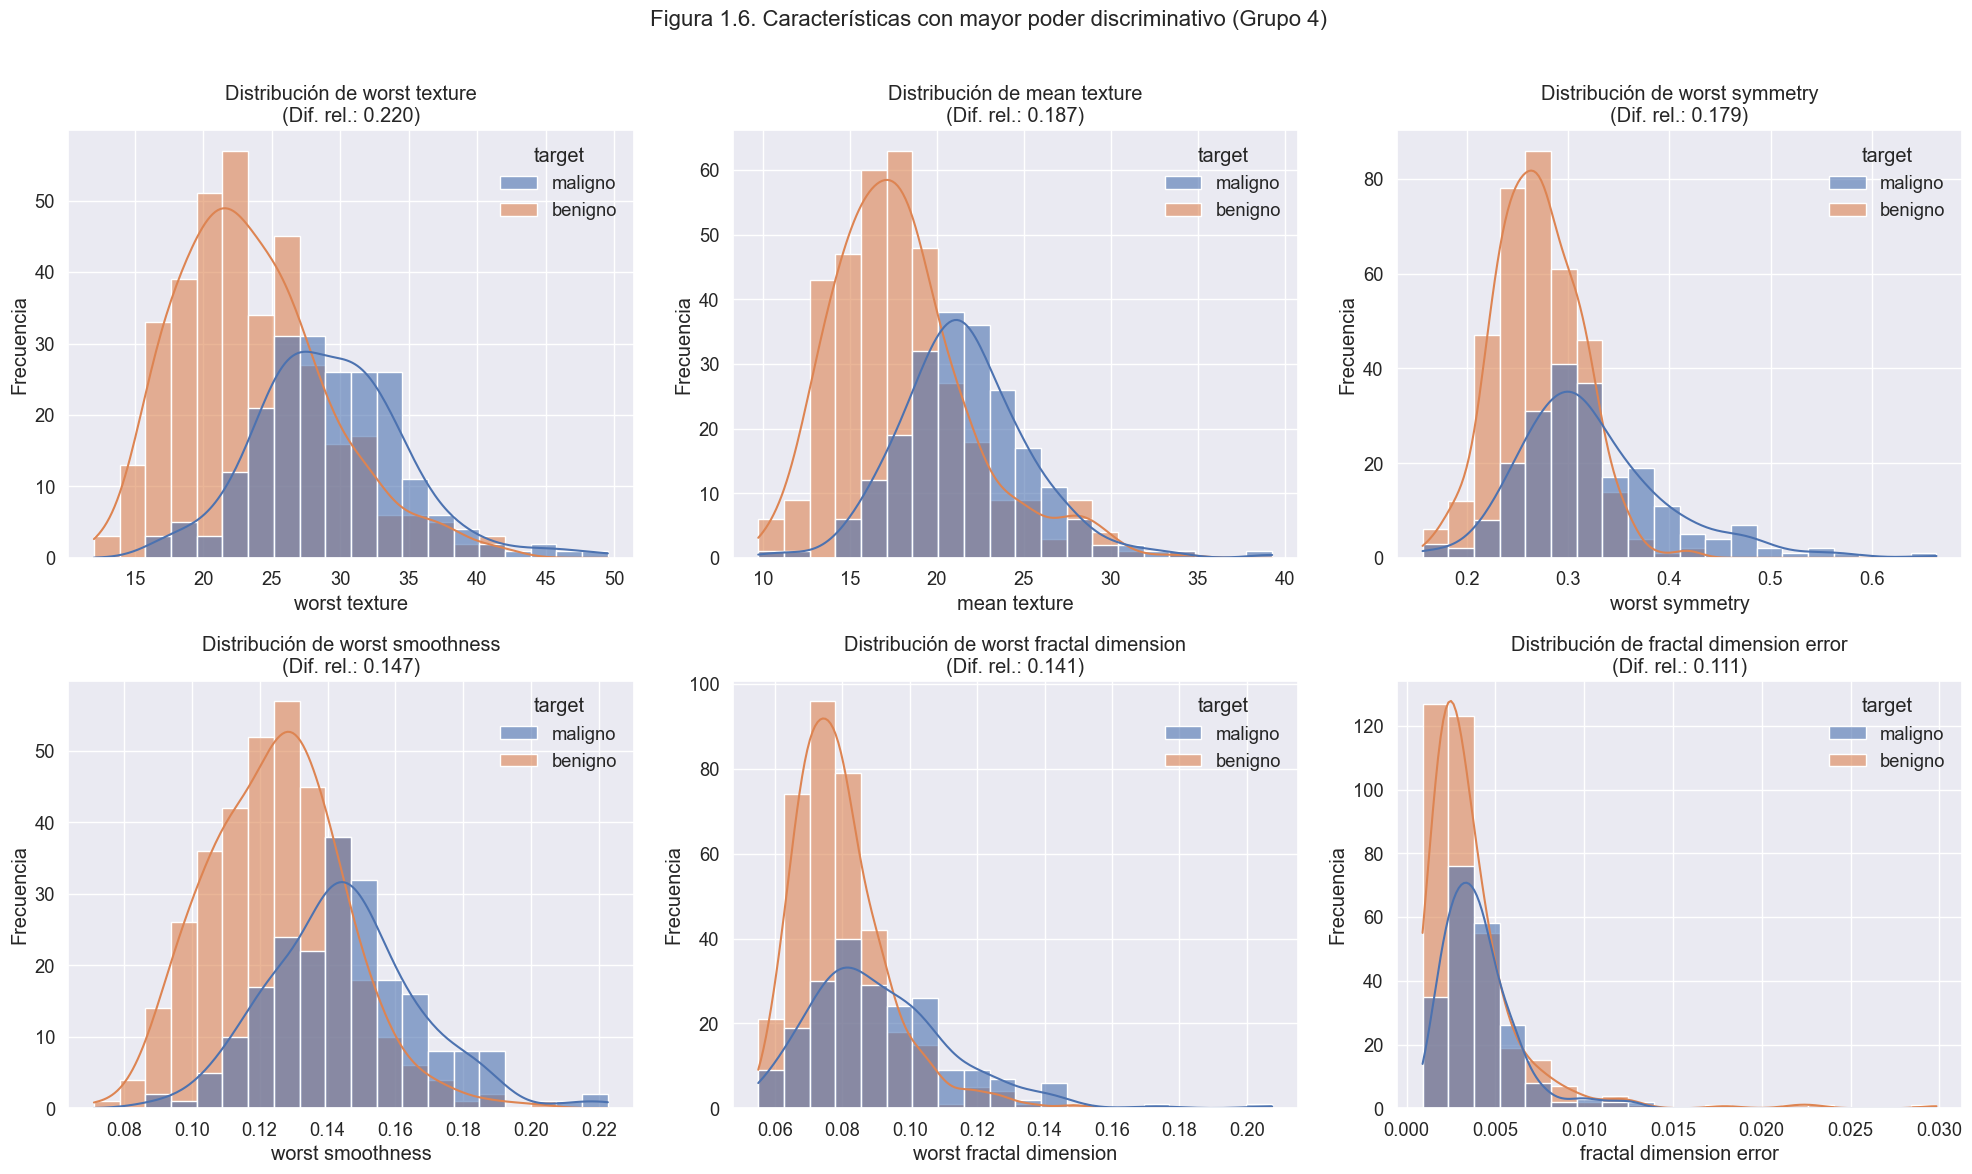

Grupo 4: características 19-24 (de 30)


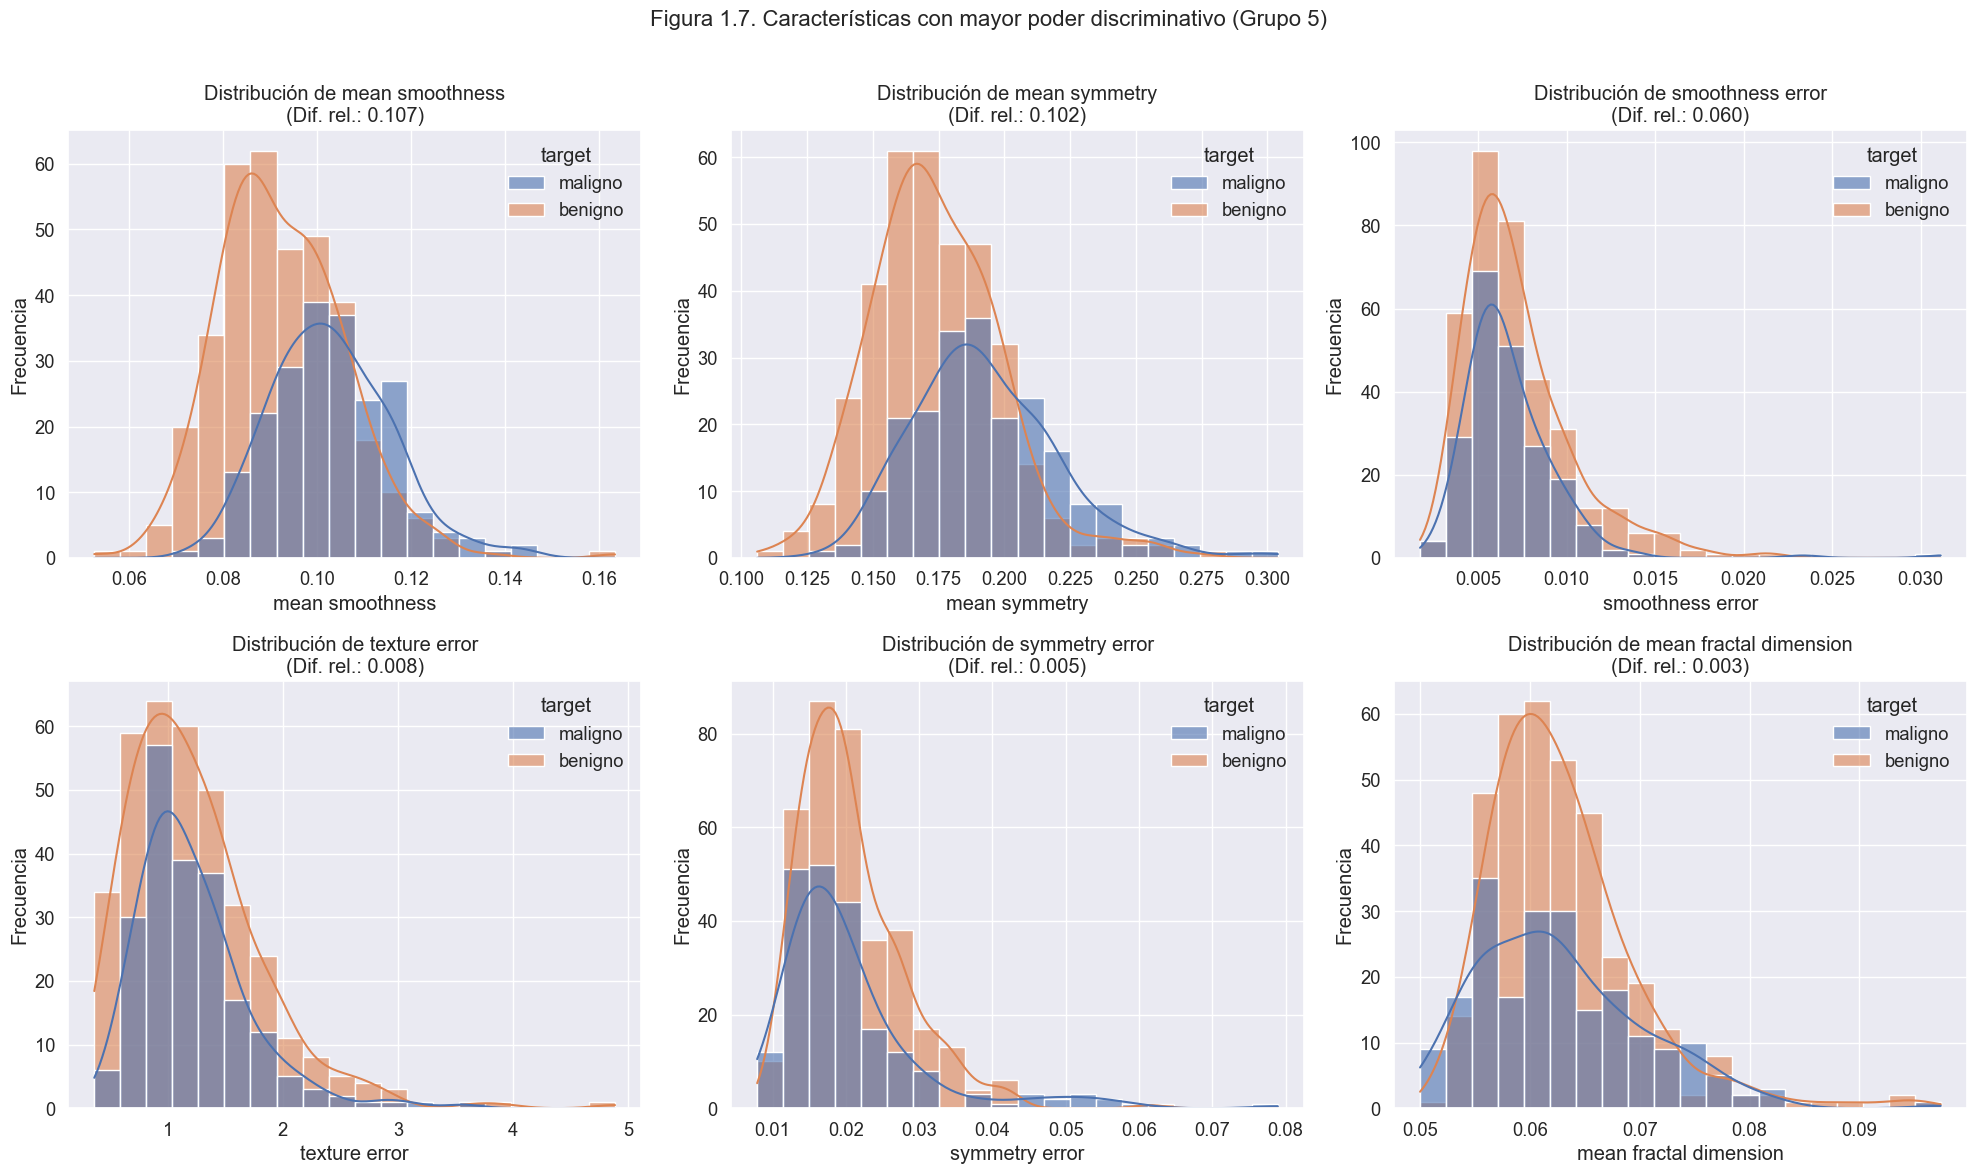

Grupo 5: características 25-30 (de 30)


In [7]:
# Creamos un DataFrame con las características y la variable objetivo
data = X.join(y_labels)

# Ordenamos las características por su diferencia relativa (de mayor a menor)
sorted_features = relative_sort_diff.index.tolist()

# Visualizamos las características en orden de poder discriminativo
n_features_per_plot = 6  # Número de características por figura
n_plots = len(sorted_features) // n_features_per_plot + (1 if len(sorted_features) % n_features_per_plot > 0 else 0)

for plot_idx in range(n_plots):
    start_idx = plot_idx * n_features_per_plot
    end_idx = min((plot_idx + 1) * n_features_per_plot, len(sorted_features))
    features_subset = sorted_features[start_idx:end_idx]
    
    # Solo creamos la figura si hay características para mostrar
    if features_subset:
        fig = plt.figure(figsize=(20, 12))
        
        for i, feature in enumerate(features_subset):
            plt.subplot(2, 3, i+1)
            sns.histplot(data=data, x=feature, hue='target', kde=True, bins=20, alpha=0.6)
            
            # Añadimos el valor de diferencia relativa al título para referencia
            diff_value = relative_diff[feature]
            plt.title(f'Distribución de {feature}\n(Dif. rel.: {diff_value:.3f})')
            
            plt.xlabel(feature)
            plt.ylabel('Frecuencia')
        
        plt.suptitle(f'Figura 1.{3 + plot_idx}. Características con mayor poder discriminativo (Grupo {plot_idx+1})', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.97])  # Ajustar espacio para el título superior
        plt.savefig(f'{output_dir}/distri_discriminativas_grupo{plot_idx+1}.png', dpi=100, bbox_inches='tight')
        plt.show()
        plt.close(fig)  # Cerramos explícitamente la figura
        
        print(f"Grupo {plot_idx+1}: características {start_idx+1}-{end_idx} (de {len(sorted_features)})")



En la **Figura 1.8** complementamos el análisis univariante con una matriz de dispersión (pairplot) que muestra las relaciones bivariantes entre las características seleccionadas, diferenciando por clase. esta visualización nos ayuda a identificar posibles combinaciones de variables que separar mejor las clases. En la siguiente sección revisaremos las técnicas de selección de variables de la PEC 2. Por ahora, mostramos las 11 variables con mayor diferencia relativa entre clases. En las que podemos ver: 

1. **Separación clara entre clases**: En casi todos los gráficos de dispersión hay una separación relativamente definida entre los tumores benignos (naranja) y malignos (azul), aunque con algunas zonas de solapamiento.

2. **Valores consistentemente mayores en tumores malignos**: En todas las características visualizadas, los tumores malignos (azul) tienden a presentar valores más elevados que los benignos (naranja). Esto se aprecia tanto en las distribuciones de densidad de la diagonal (donde las curvas azules están desplazadas a la derecha) como en los gráficos de dispersión (donde los puntos azules se concentran en regiones de valores más altos).

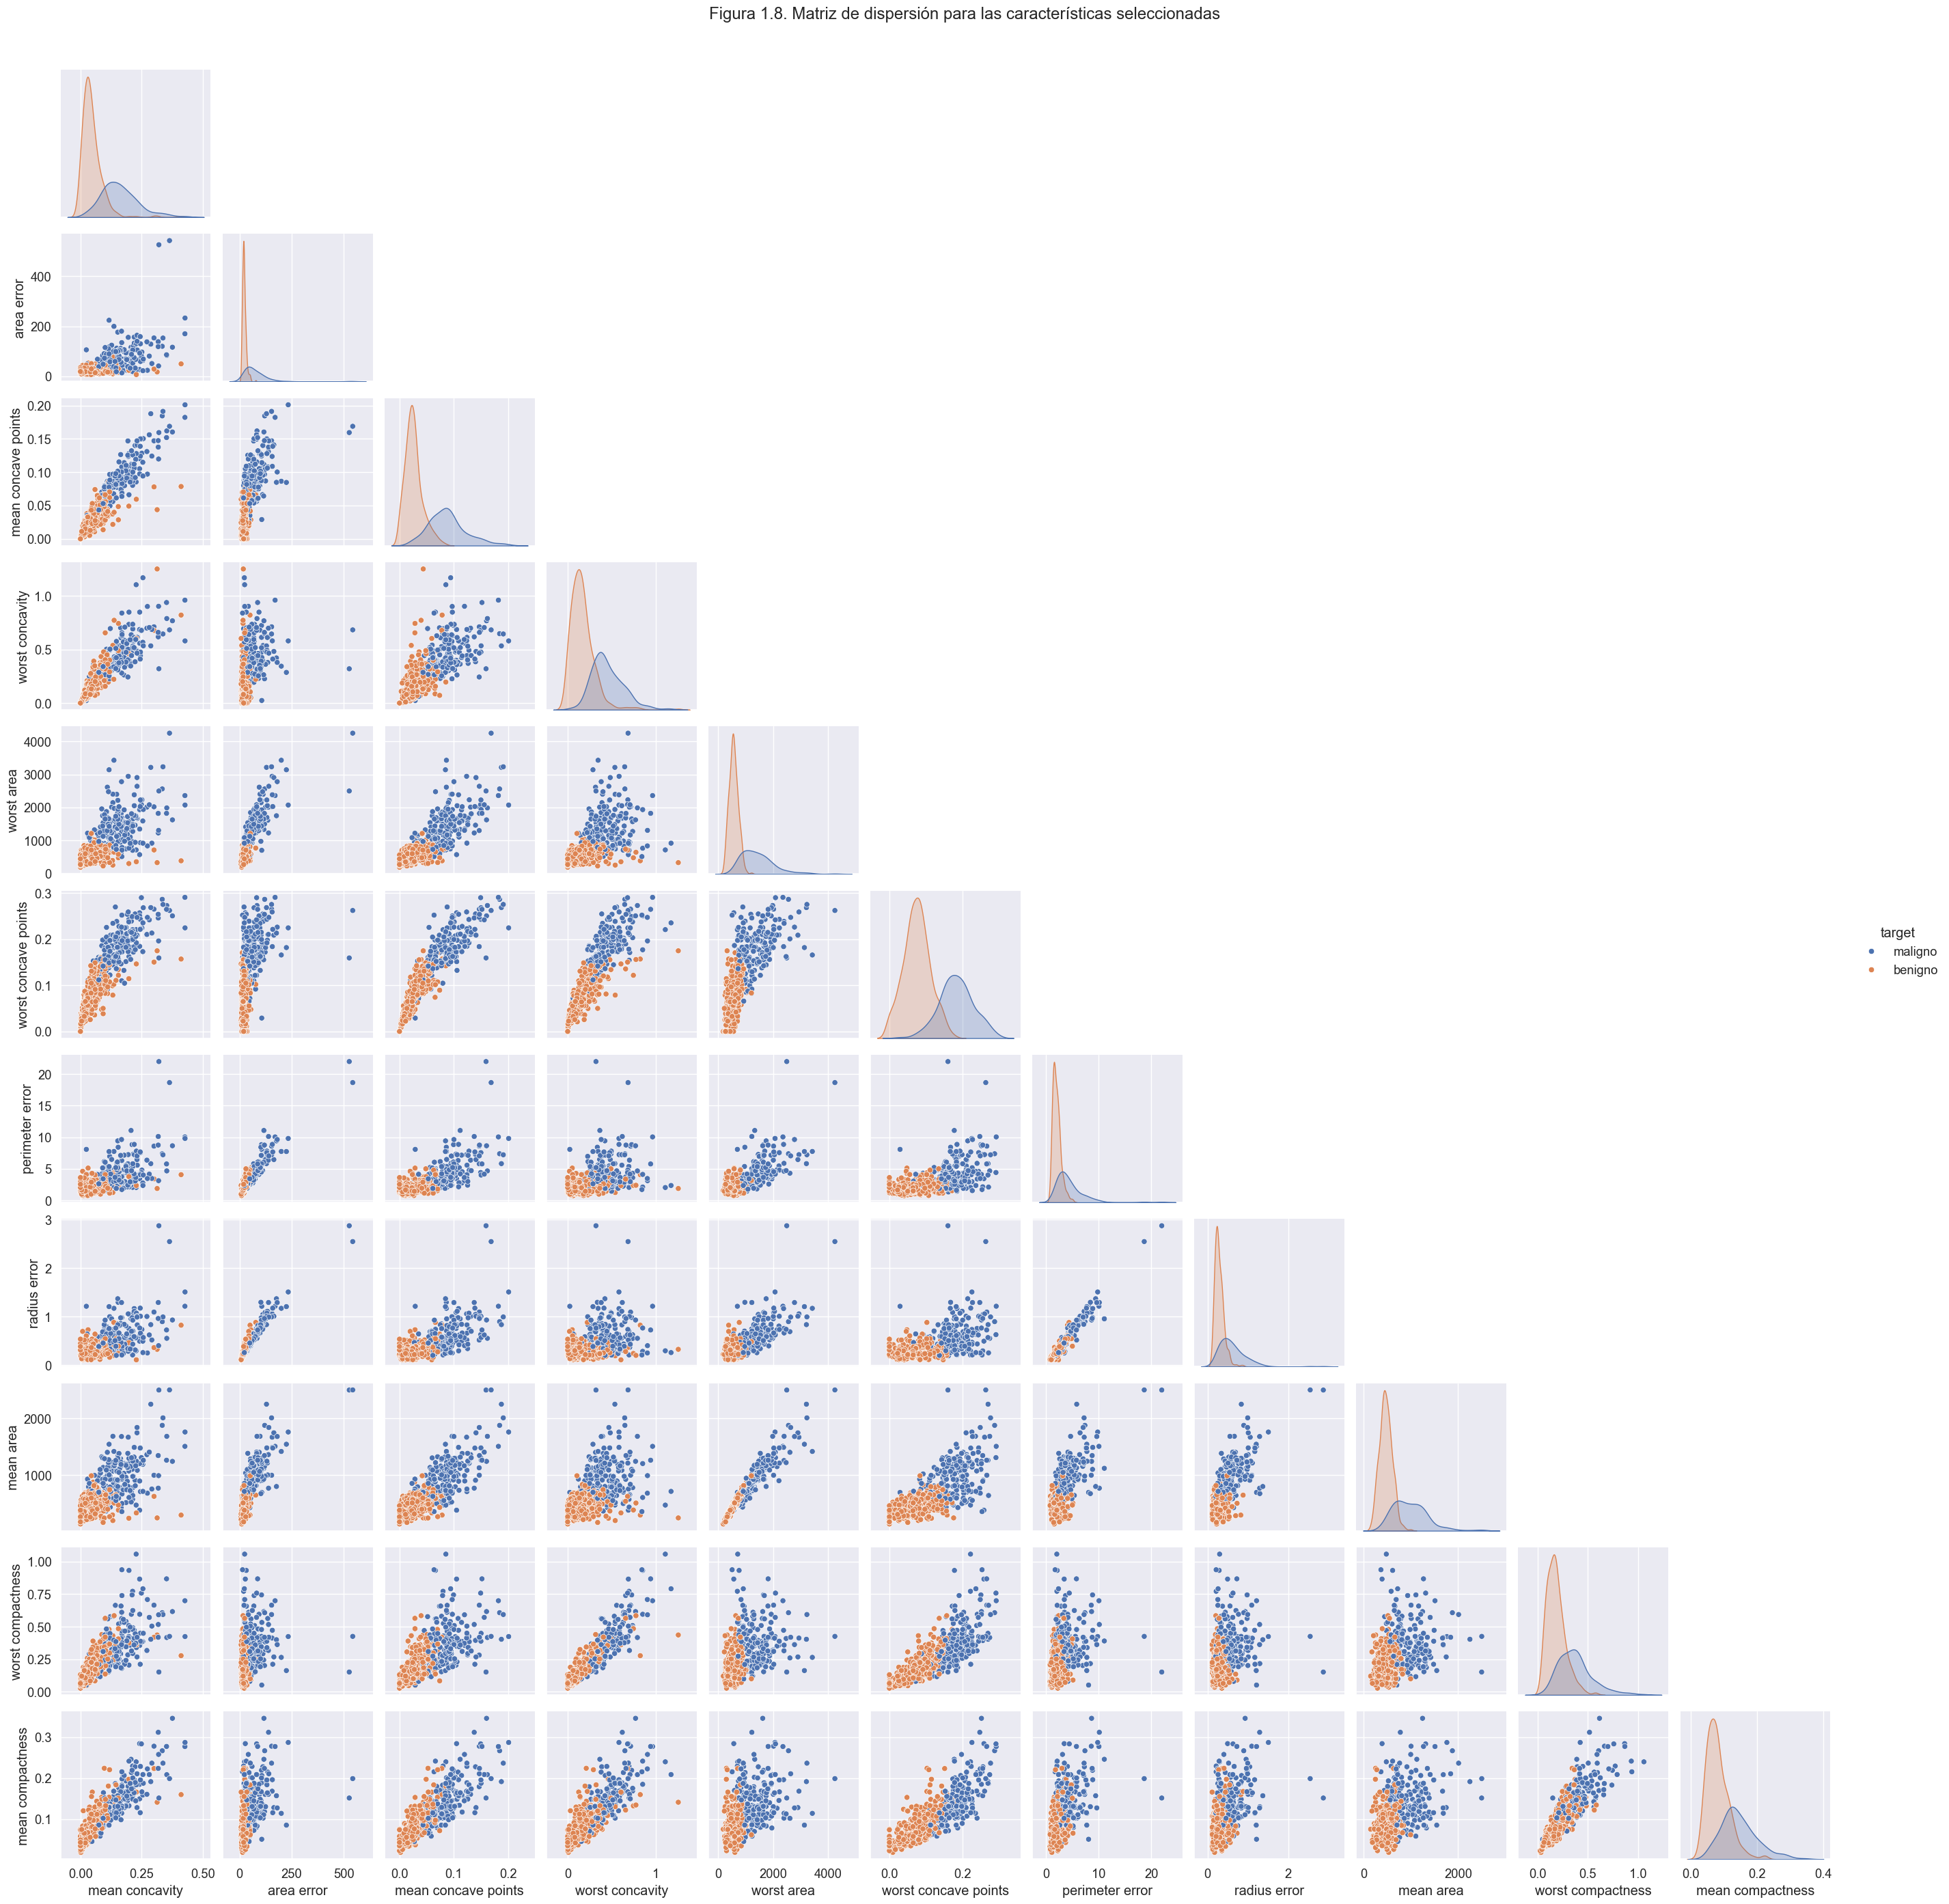

In [8]:
# Crear un gráfico de pares para las características seleccionadas
top11_features = relative_sort_diff.index[:11].tolist()
sns.pairplot(data=X[top11_features].join(y_labels), hue='target', 
             corner=True, diag_kind='kde', height=2.5, aspect=1)
plt.suptitle('Figura 1.8. Matriz de dispersión para las características seleccionadas', y=1.02)
plt.savefig(f'{output_dir}/matriz_dispersion_carc_top.png', dpi=100, bbox_inches='tight')
plt.show()



Finalmente, en la **Figura 1.9** analizamos las correlaciones entre todas las características mediante un mapa de calor, lo que nos permite identificar grupos de variables altamente correlacionadas que podrían ser redundantes. 

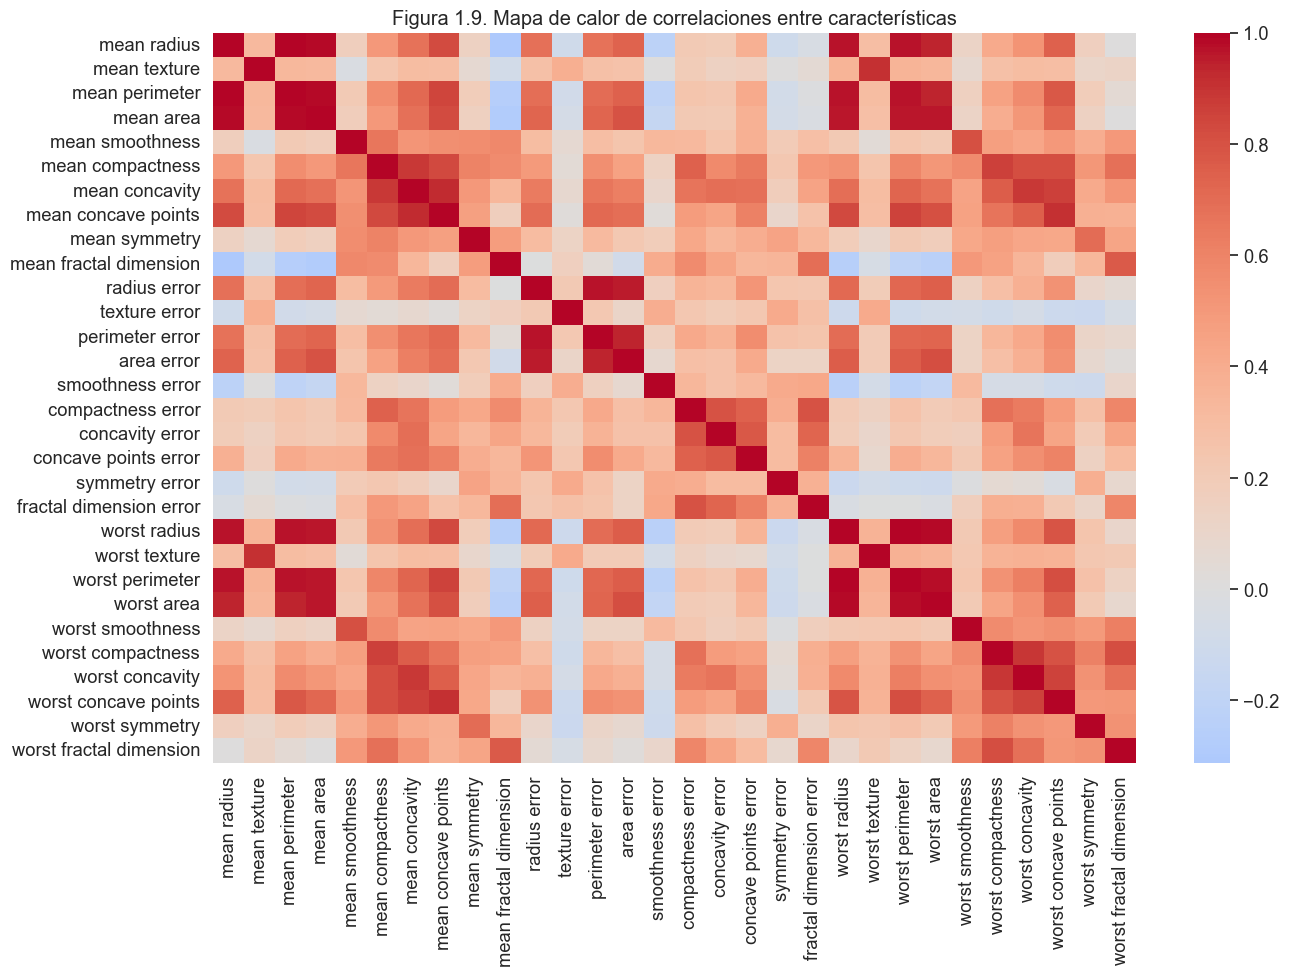

In [9]:
# Mapa de calor de correlaciones
plt.figure(figsize=(14, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Figura 1.9. Mapa de calor de correlaciones entre características')
plt.tight_layout()

plt.savefig(f'{output_dir}/mapa_calor_correl.png', dpi=100, bbox_inches='tight')
plt.show()


En la **Figura 9** podemos observar que apaenas hay correlaciones negativas, es decir que el valor menor es aproximadamente -0.3. Esto indica que las variables tienden a variar de manaera conjunta y en la misma dirección. Quizá el hecho de que muchas variables estén correlacionadas positivamente podría darnos una pista de que exista redundancia en el conjunto de datos. 

Con las representaciones anteriorespodemos inferir que los tumores malignos tienden a presentar valores más altos en muchas características (según los histogramas) y que muchas de estas características están positivamente correlacionadas entre sí (según la matriz de correlación). Para facilitar la interpretación, en la **Tabla 5** extraemos y visualizamos las 20 correlaciones más fuertes en el conjunto de datos. 

In [10]:
# Creamos un mapa de calor más legible con las correlaciones más altas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

# Mostramos las 20 correlaciones más altas
top_corr = get_top_correlations(X, 20)
print("Tabla 1.5. Las 20 correlaciones más altas entre características:")

# Método alternativo para mostrar las correlaciones de manera más clara
corr_list = []
for idx, corr_value in top_corr.items():
    # Desempaquetamos las tuplas del índice
    feat1, feat2 = idx
    corr_list.append({
        'Característica 1': feat1,
        'Característica 2': feat2,
        'Correlación': round(corr_value, 4)
    })

# Creamos un DataFrame a partir de la lista
corr_df = pd.DataFrame(corr_list)
display(corr_df)

Tabla 1.5. Las 20 correlaciones más altas entre características:


Característica 1     Característica 2  Correlación
0       mean radius       mean perimeter       0.9979
1      worst radius      worst perimeter       0.9937
2       mean radius            mean area       0.9874
3    mean perimeter            mean area       0.9865
4      worst radius           worst area       0.9840
5   worst perimeter           worst area       0.9776
6      radius error      perimeter error       0.9728
7    mean perimeter      worst perimeter       0.9704
8       mean radius         worst radius       0.9695
9    mean perimeter         worst radius       0.9695
10      mean radius      worst perimeter       0.9651
11        mean area         worst radius       0.9627
12        mean area           worst area       0.9592
13        mean area      worst perimeter       0.9591
14     radius error           area error       0.9518
15   mean perimeter           worst area       0.9415
16      mean radius           worst area       0.9411
17  perimeter error           area error       0.9377
18   mean concavity  mean concave points       0.9214
19     mean texture        worst texture       0.9120

## <font color="#000000"> 1.5. Análisis de valores faltantes y atípicos</font><a id="section15"></a>


Es fundamental verificar la presencia de valores faltantes y observaciones atípicas (outliers) en el conjunto de datos, ya que pueden afectar significativamente el rendimiento de los modelos. a continuación, analizamos estos aspectos para determinar si es necesario aplicar técnicas específicas de tratamiento.

Primero, examinamos, y mostramos en la **Tabla 6**, el conjunto de datos para detectar valores faltantes, calculando su cantidad y porcentaje para cada característica.

In [11]:
# Verificar valores faltantes en el dataset
missing_values = X.isnull().sum()
missing_percentage = (missing_values / len(X)) * 100

print("Tabla 1.6. Valores faltantes por columna:")
missing_data = pd.DataFrame({
    'Número de valores faltantes': missing_values,
    'Porcentaje de valores faltantes': missing_percentage
})
display(missing_data[missing_data['Número de valores faltantes'] > 0])

if missing_data['Número de valores faltantes'].sum() == 0:
    print("El dataset no contiene valores faltantes.")

Tabla 1.6. Valores faltantes por columna:


Empty DataFrame
Columns: [Número de valores faltantes, Porcentaje de valores faltantes]
Index: []

El dataset no contiene valores faltantes.


Posteriormente en la **Figura 1.10** , realizamos un análisis visual de valores atípicos mediante diagramas de caja (boxplots) para las 11 caracterísitcas detecatadas como las que presentan mayor diferencia media entre calses, segmentados por clase. 




estos gráficos nos permiten identificar observaciones que se alejan considerablemente del comportamiento típico de cada variable y verificar si existen patrones diferentes de outliers entre casos benignos y malignos.

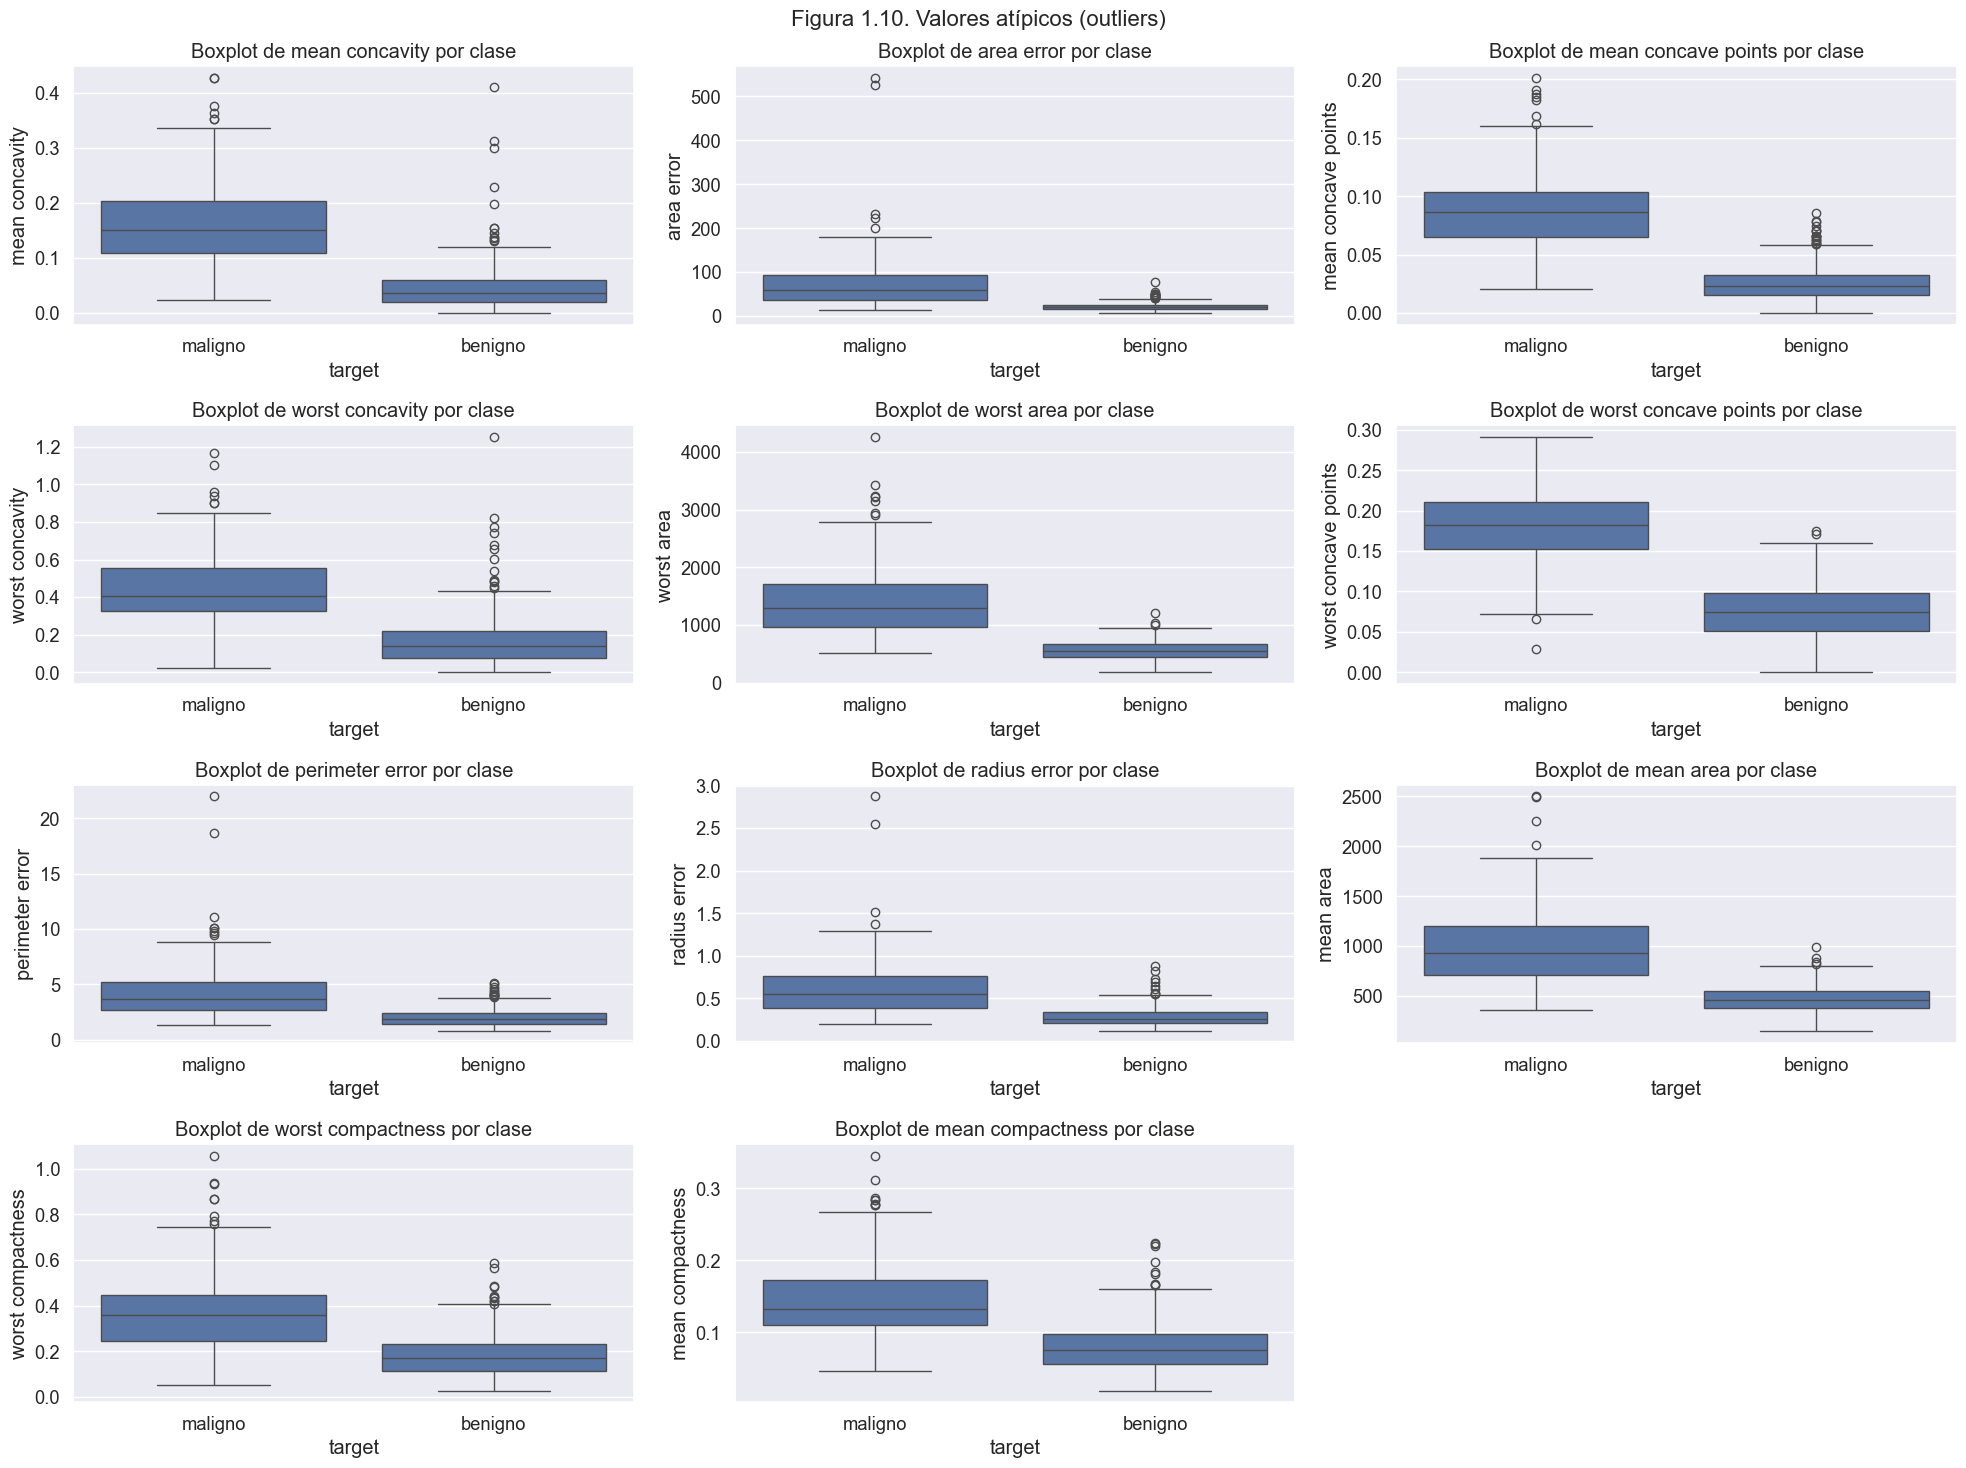

In [12]:
# Análisis de valores atípicos usando diagramas de caja (boxplots)
plt.figure(figsize=(20, 15))
# Calculamos filas y columnas necesarias (4 filas x 3 columnas dará espacio para las 11 características)
rows, cols = 4, 3

for i, feature in enumerate(top11_features):
    if i < len(top11_features):
        plt.subplot(rows, cols, i+1)
        sns.boxplot(x=y_labels, y=X[feature])
        plt.title(f'Boxplot de {feature} por clase')

# Añadimos un título principal para toda la figura
plt.suptitle('Figura 1.10. Valores atípicos (outliers)', fontsize=16, y=0.98)

plt.tight_layout()

plt.savefig(f'{output_dir}/boxplot_atipicos.png', dpi=100, bbox_inches='tight')
plt.show()



Ahora, complementamos el análisis visual con métodos estadísticos para la detección sistemática de valores atípicos. Para tener una idea clara sobre la presencia y distribución de valores atípicos en el conjunto de datos.

In [13]:
def detect_outliers_comprehensive(df, class_labels=None, method="zscore", n_std=3):
    """
    Detecta outliers usando método z-score o IQR, con opción de desglose por clase.
    
    Parámetros:
    df (DataFrame): DataFrame con las características
    class_labels (Series, opcional): Etiquetas de clase para desglose
    method (str): Método de detección ("zscore" o "iqr")
    n_std (float): Para z-score, número de desviaciones estándar
    
    Retorna:
    DataFrame con recuento y porcentaje de outliers
    """
    outliers_info = {}
    total_rows = len(df)
    has_classes = class_labels is not None
    
    # Preparar datos combinados si se proporcionan etiquetas de clase
    if has_classes:
        combined_df = df.copy()
        combined_df['target'] = class_labels
        class_counts = class_labels.value_counts()
    
    for feature in df.columns:
        # Inicializar diccionario para esta característica
        outliers_info[feature] = {}
        
        # CÁLCULO GLOBAL (todas las muestras)
        if method == "zscore":
            # Método Z-score
            z_scores = ((df[feature] - df[feature].mean()) / df[feature].std()).abs()
            outliers = (z_scores > n_std).sum()
        else:
            # Método IQR
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
        
        # Guardar resultados globales
        outliers_info[feature]['count_total'] = outliers
        outliers_info[feature]['percentage_total'] = (outliers/total_rows)*100
        
        # CÁLCULO POR CLASE (si se proporcionaron etiquetas)
        if has_classes:
            for class_name in class_labels.unique():
                # Filtrar datos de esta clase
                class_data = combined_df[combined_df['target'] == class_name][feature]
                class_size = len(class_data)
                
                if method == "zscore":
                    # Z-score dentro de esta clase
                    class_z_scores = ((class_data - class_data.mean()) / class_data.std()).abs()
                    class_outliers = (class_z_scores > n_std).sum()
                else:
                    # IQR dentro de esta clase
                    class_Q1 = class_data.quantile(0.25)
                    class_Q3 = class_data.quantile(0.75)
                    class_IQR = class_Q3 - class_Q1
                    class_lower = class_Q1 - 1.5 * class_IQR
                    class_upper = class_Q3 + 1.5 * class_IQR
                    class_outliers = ((class_data < class_lower) | (class_data > class_upper)).sum()
                
                # Guardar resultados por clase
                outliers_info[feature][f'count_{class_name}'] = class_outliers
                outliers_info[feature][f'percentage_{class_name}'] = (class_outliers/class_size)*100
    
    return pd.DataFrame.from_dict(outliers_info, orient='index')

# Formateamos y mostramos los resultados
# Función para formatear la tabla para mostrar
def format_outliers_table(df, method_name):
    # Seleccionamos sólo filas con outliers
    df_filtered = df[df['count_total'] > 0].copy()
    
    # Seleccionamos columnas relevantes y renombramos para mejor visualización
    cols_to_show = ['count_total', 'percentage_total', 
                   'count_maligno', 'percentage_maligno', 
                   'count_benigno', 'percentage_benigno']
    
    new_col_names = ['Total', '% Total', 
                     'Malignos', '% Malignos', 
                     'Benignos', '% Benignos']
    
    # Reordenamos columnas y renombramos
    result = df_filtered[cols_to_show].copy()
    result.columns = new_col_names
    
    # Redondeamos porcentajes para mejor visualización
    for col in ['% Total', '% Malignos', '% Benignos']:
        result[col] = result[col].round(2)
    
    # Título de la tabla
    if method_name == "zscore":
        print("\nTabla 1.6. Detección de outliers usando Z-score (3 desviaciones estándar) por clase:")
    else:
        print("\nTabla 1.7. Detección de outliers usando método IQR por clase:")
    
    # Para IQR, limitamos a top 10 si hay muchas filas
    if method_name == "iqr":
        return result.head(10)
    else:
        return result

1. **Método z-score**: identificamos como outliers aquellos valores que se encuentran a más de 3 desviaciones estándar de la media de cada característica (**Tabla 1.6**).

In [14]:
# Aplicamos la función para obtener resultados
# Para Z-score con desglose por clase
outliers_zscore_by_class = detect_outliers_comprehensive(X, y_labels, method="zscore", n_std=3)
outliers_zscore_by_class = outliers_zscore_by_class.sort_values('count_total', ascending=False)

# Mostramos la tabla
display(format_outliers_table(outliers_zscore_by_class, "zscore"))


Tabla 1.6. Detección de outliers usando Z-score (3 desviaciones estándar) por clase:


Total  % Total  Malignos  % Malignos  Benignos  \
compactness error           12     2.11         3        1.42         9   
symmetry error              11     1.93         7        3.30         5   
worst compactness           10     1.76         3        1.42         4   
worst area                  10     1.76         3        1.42         1   
fractal dimension error     10     1.76         5        2.36         5   
texture error                9     1.58         4        1.89         3   
worst symmetry               9     1.58         3        1.42         2   
worst fractal dimension      9     1.58         2        0.94         6   
mean compactness             9     1.58         2        0.94         5   
mean concavity               9     1.58         2        0.94         5   
mean area                    8     1.41         3        1.42         2   
perimeter error              8     1.41         2        0.94         5   
radius error                 7     1.23         2        0.94         5   
smoothness error             7     1.23         2        0.94         5   
mean perimeter               7     1.23         3        1.42         1   
mean fractal dimension       7     1.23         1        0.47         6   
worst concavity              7     1.23         2        0.94         7   
mean concave points          6     1.05         2        0.94         4   
area error                   6     1.05         2        0.94         7   
concavity error              6     1.05         4        1.89         4   
concave points error         6     1.05         3        1.42         7   
worst radius                 6     1.05         1        0.47         1   
worst perimeter              6     1.05         1        0.47         0   
mean symmetry                5     0.88         2        0.94         5   
mean smoothness              5     0.88         2        0.94         2   
mean radius                  5     0.88         3        1.42         1   
worst texture                4     0.70         2        0.94         3   
mean texture                 4     0.70         2        0.94         3   
worst smoothness             3     0.53         2        0.94         3   

                         % Benignos  
compactness error              2.52  
symmetry error                 1.40  
worst compactness              1.12  
worst area                     0.28  
fractal dimension error        1.40  
texture error                  0.84  
worst symmetry                 0.56  
worst fractal dimension        1.68  
mean compactness               1.40  
mean concavity                 1.40  
mean area                      0.56  
perimeter error                1.40  
radius error                   1.40  
smoothness error               1.40  
mean perimeter                 0.28  
mean fractal dimension         1.68  
worst concavity                1.96  
mean concave points            1.12  
area error                     1.96  
concavity error                1.12  
concave points error           1.96  
worst radius                   0.28  
worst perimeter                0.00  
mean symmetry                  1.40  
mean smoothness                0.56  
mean radius                    0.28  
worst texture                  0.84  
mean texture                   0.84  
worst smoothness               0.84

2. **Método del rango intercuartílico (IQR)**: En la **Tabla 1.7** detectamos valores atípicos representados en la **Figura 11** como aquellos ```outlier < (Q1 - 1.5*IQR) or outlier > (Q3 + 1.5*IQR)```, de las variables que tienen mayor número de autliers.

In [15]:
# Para IQR con desglose por clase
outliers_iqr_by_class = detect_outliers_comprehensive(X, y_labels, method="iqr")
outliers_iqr_by_class = outliers_iqr_by_class.sort_values('count_total', ascending=False)

# Mostramos la tablas
display(format_outliers_table(outliers_iqr_by_class, "iqr"))


Tabla 1.7. Detección de outliers usando método IQR por clase:


Total  % Total  Malignos  % Malignos  Benignos  \
area error                  65    11.42         5        2.36        15   
radius error                38     6.68         4        1.89         9   
perimeter error             38     6.68         8        3.77        12   
worst area                  35     6.15         7        3.30         3   
smoothness error            30     5.27         5        2.36        17   
compactness error           28     4.92        11        5.19        23   
fractal dimension error     28     4.92         9        4.25        26   
symmetry error              27     4.75        16        7.55        10   
mean area                   25     4.39         4        1.89         4   
worst fractal dimension     24     4.22         4        1.89        13   

                         % Benignos  
area error                     4.20  
radius error                   2.52  
perimeter error                3.36  
worst area                     0.84  
smoothness error               4.76  
compactness error              6.44  
fractal dimension error        7.28  
symmetry error                 2.80  
mean area                      1.12  
worst fractal dimension        3.64

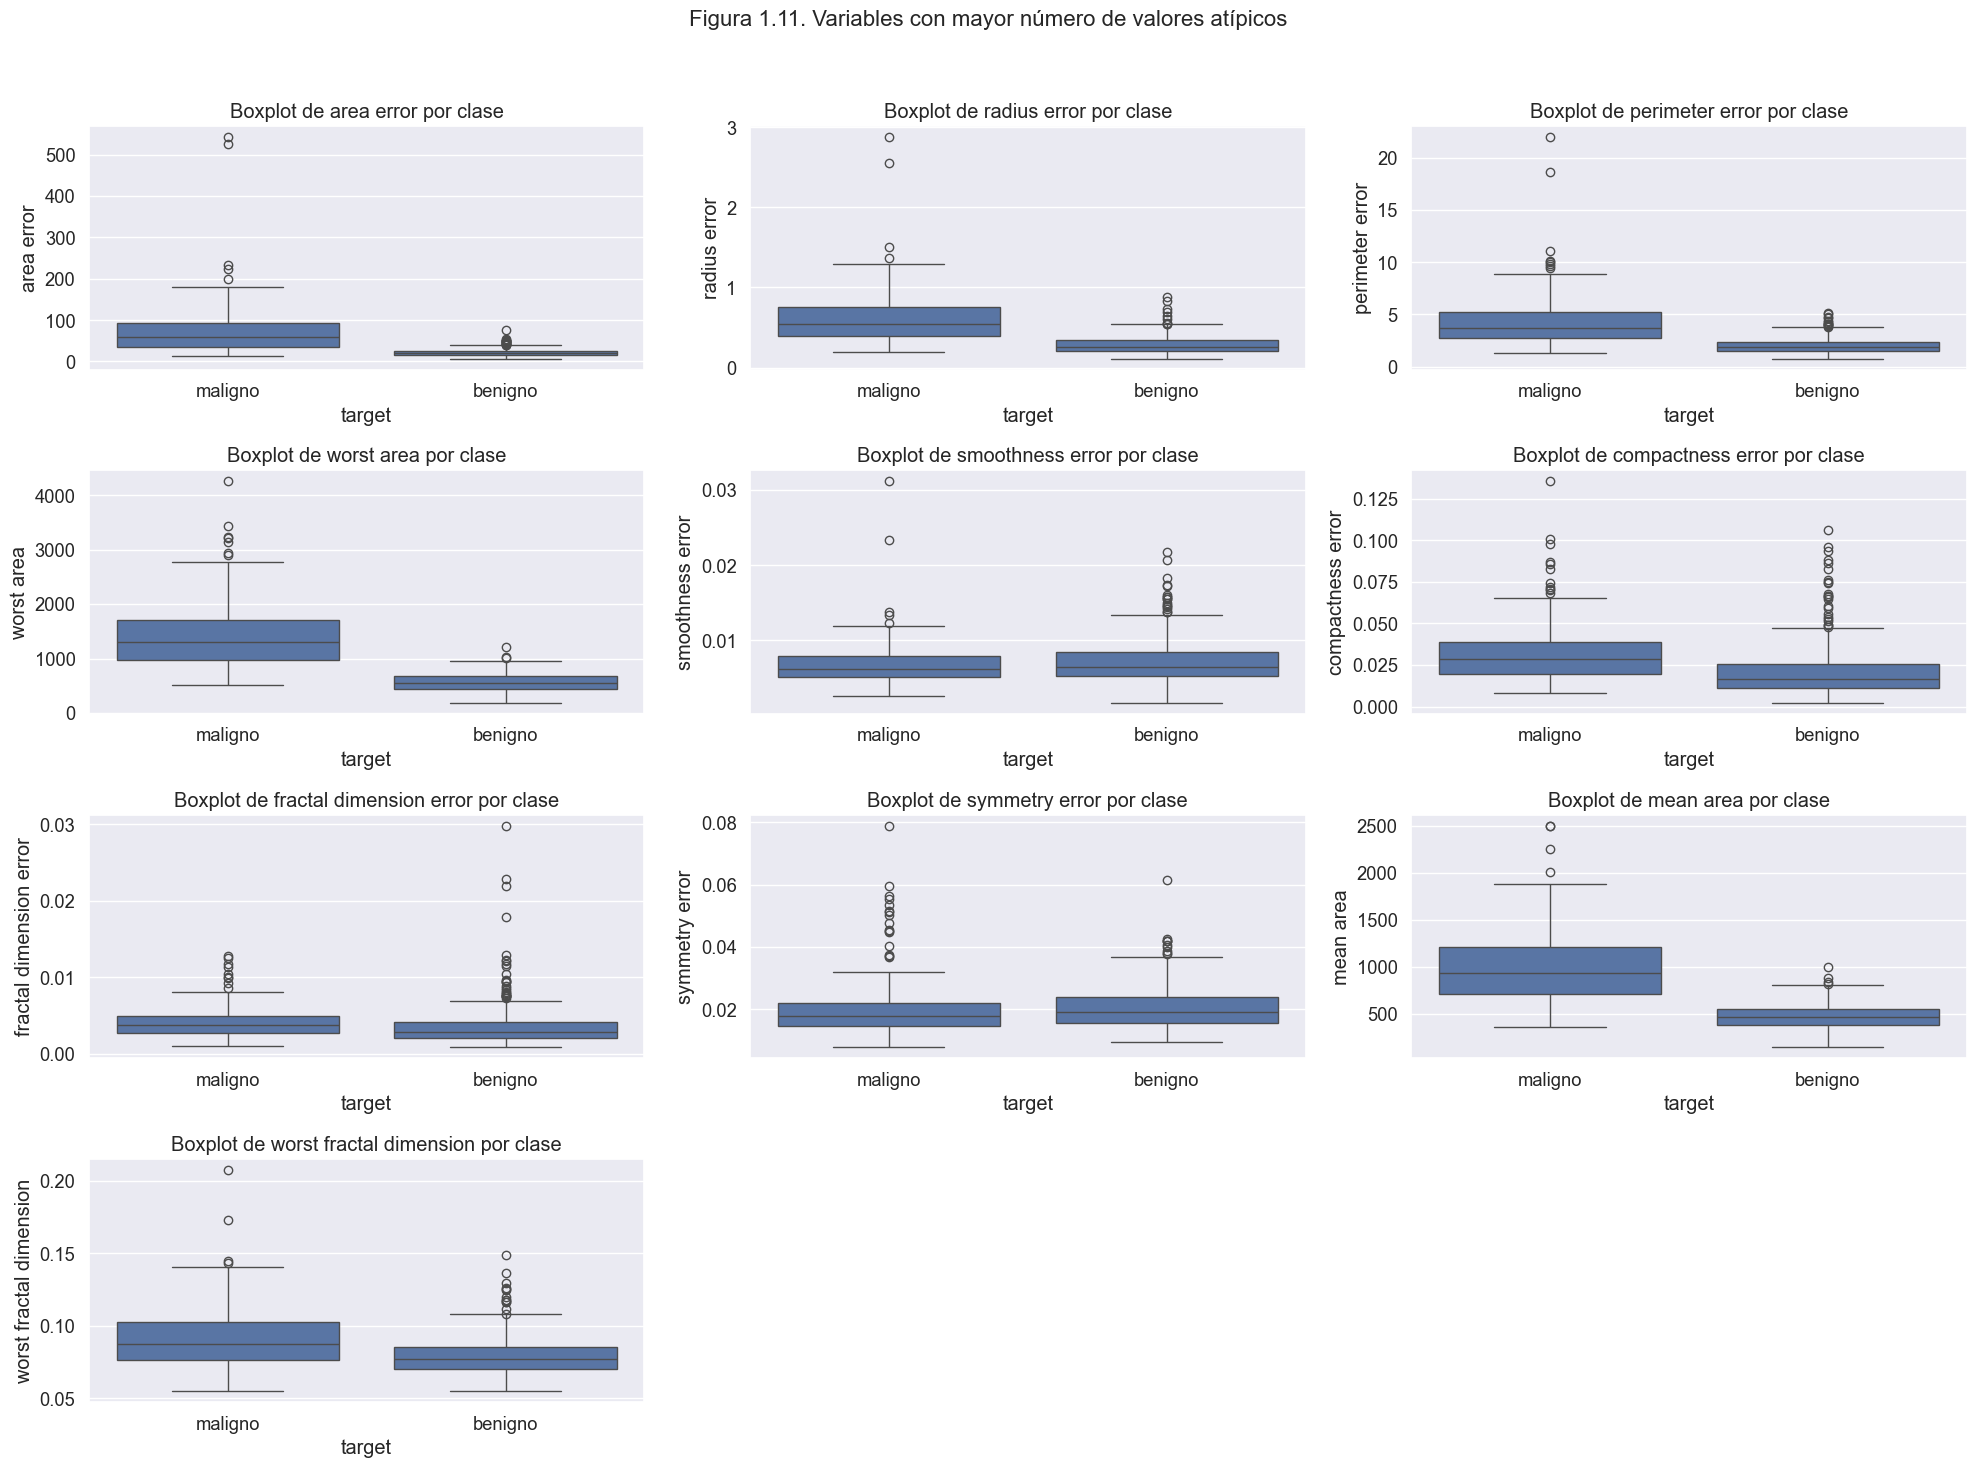

In [16]:
# Seleccionamos las 10 variables con más outliers según el método IQR
top_outlier_features = outliers_iqr_by_class[outliers_iqr_by_class['count_total'] > 0].head(10).index.tolist()

# Análisis de valores atípicos para variables con mayor número de outliers
plt.figure(figsize=(20, 15))
rows, cols = 4, 3
for i, feature in enumerate(top_outlier_features):
    if i < len(top_outlier_features):
        plt.subplot(rows, cols, i+1)
        sns.boxplot(x=y_labels, y=X[feature])
        plt.title(f'Boxplot de {feature} por clase')

# Añadimos un título principal para toda la figura
plt.suptitle('Figura 1.11. Variables con mayor número de valores atípicos', fontsize=16, y=0.98)

# Ajustamos el espacio reservando espacio para el título principal
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{output_dir}/boxplot_mayores_atipicos.png', dpi=100, bbox_inches='tight')
plt.show()

Para este análisis es importante tener en cuenta que los valores que parecen "atípicos" en la distribución global (**Figura 1.12a**), pero son comunes dentro de su clase (**Figura 1.12b**)pueden ser precisamente los más informativos para la clasificación. Por ejemplo, si muchos tumores malignos presentan valores altos de "area error" (**Figura 1.12c**) que serían considerados outliers en el conjunto global, esta característica podría ser un buen discriminador entre clases. 

Por otro lado, al considerar los outliers por clase, evitamos eliminar o transformar valores que son normales dentro de su grupo pero atípicos globalmente, preservando así la señal discriminativa que es propia en las diferencias entre clases, lo que tiene más sentido ya qie buscamos identificar patrones que distinguen entre clases.

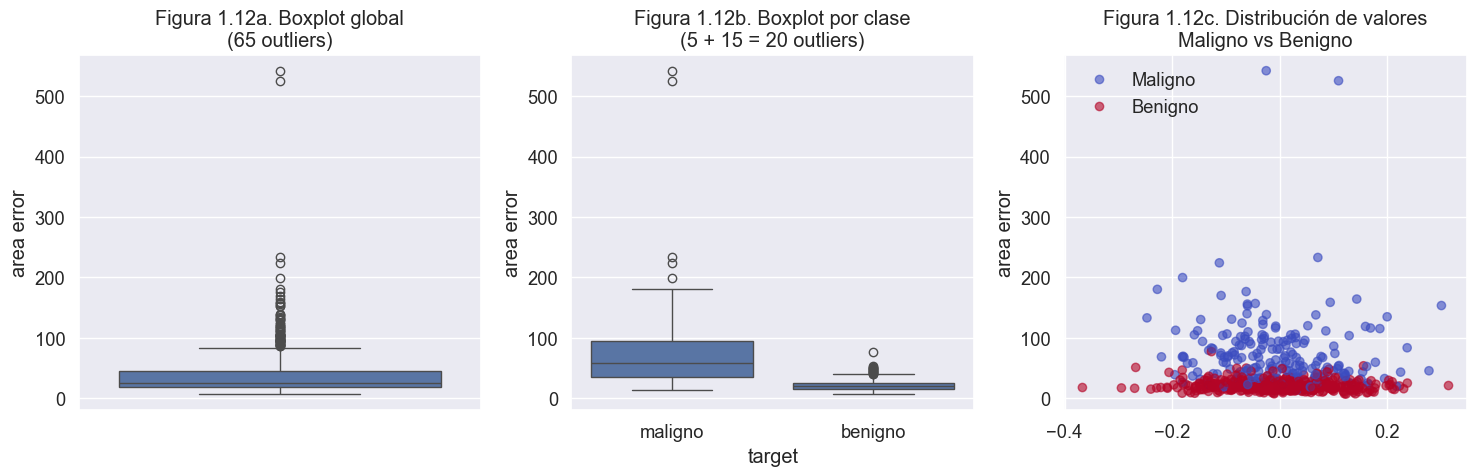

In [17]:
plt.figure(figsize=(15, 5))

# Boxplot global (para todos los datos)
plt.subplot(1, 3, 1)
sns.boxplot(y=X['area error'])
plt.title('Figura 1.12a. Boxplot global\n(65 outliers)')
plt.ylabel('area error')

# Boxplot desglosado por clase
plt.subplot(1, 3, 2)
sns.boxplot(x=y_labels, y=X['area error'])
plt.title('Figura 1.12b. Boxplot por clase\n(5 + 15 = 20 outliers)')
plt.ylabel('area error')

# Scatterplot que muestra los valores por clase
plt.subplot(1, 3, 3)
scatter = plt.scatter(
    x=np.random.normal(0, 0.1, size=len(X)), 
    y=X['area error'],
    c=[0 if label=='maligno' else 1 for label in y_labels],
    alpha=0.6,
    cmap='coolwarm'
)
plt.legend(handles=scatter.legend_elements()[0], labels=['Maligno', 'Benigno'])
plt.title('Figura 1.12c. Distribución de valores\nMaligno vs Benigno')
plt.xlabel('')
plt.ylabel('area error')
plt.tight_layout()

plt.savefig(f'{output_dir}/visualizacion_outliers_area_error.png', dpi=100, bbox_inches='tight')
plt.show()

## <font color="#000000"> 1.6. Análisis de distribuciones</font><a id="section16"></a>


El análisis de la distribución de las variables nos permite entender su comportamiento estadístico y determinar si se ajustan a distribuciones normales, que es importante para los algoritmos de aprendizaje automático. Además, este análisis nos ayuda a identificar posibles transformaciones que podrían mejorar el rendimiento de los modelos.

En primer lugar, aplicamos la prueba de normalidad shapiro-wilk a las 11 características principales seleccionadas. Esta prueba estadística evalúa la hipótesis nula de que los datos provienen de una población normalmente distribuida. Un p-valor por debajo del umbral de significancia (típicamente 0.05) nos lleva a rechazar esta hipótesis, indicando que la distribución se aleja de la normalidad. 

Como se ve en la **Tabla 1.8** La prueba de Shapiro-Wilk nos da p-valores muy bajos (todos inferiores a 1.98e-10), por lo que se rechaza la hipótesis nula de normalidad. Esto nos lleva a pensar que se deberían preferir las transformaciones de normalización logarítmicas o Box-Cox podrían si pensamos aplicar métodos paramétricos. Aunque los métodos no paramétricos serían más apropiados. Por último, para modelado, los algoritmos que no asumen normalidad (como Random Forest Extra Trees y Bagging, o SVM con ciertos kernels) podrían ser preferibles.

In [18]:
# Realizar prueba de normalidad Shapiro-Wilk para las características principales
print("Tabla 1.8. Prueba de normalidad Shapiro-Wilk para las características principales:")
normality_results = {}
for feature in top11_features:
    stat, p_value = stats.shapiro(X[feature])
    normality_results[feature] = {
        'estadístico': stat,
        'p_valor': p_value,
        'normal (alpha=0.05)': p_value > 0.05
    }

normality_df = pd.DataFrame.from_dict(normality_results, orient='index')
display(normality_df)

Tabla 1.8. Prueba de normalidad Shapiro-Wilk para las características principales:


estadístico       p_valor  normal (alpha=0.05)
mean concavity           0.866831  1.338571e-21                False
area error               0.563820  2.652703e-35                False
mean concave points      0.891650  1.404556e-19                False
worst concavity          0.917528  4.543300e-17                False
worst area               0.816070  5.595364e-25                False
worst concave points     0.964835  1.984879e-10                False
perimeter error          0.718164  7.587487e-30                False
radius error             0.745554  1.224597e-28                False
mean area                0.858401  3.196264e-22                False
worst compactness        0.891064  1.247461e-19                False
mean compactness         0.916978  3.967204e-17                False

Complementamos este análisis estadístico con gráficos Q-Q (quantile-quantile), que permiten comparar visualmente la distribución de nuestros datos con una distribución normal teórica (**Figura 1.13**). Las desviaciones de la línea diagonal en estos gráficos indican alejamientos de la normalidad, ya sea en las colas o en la región central de la distribución.

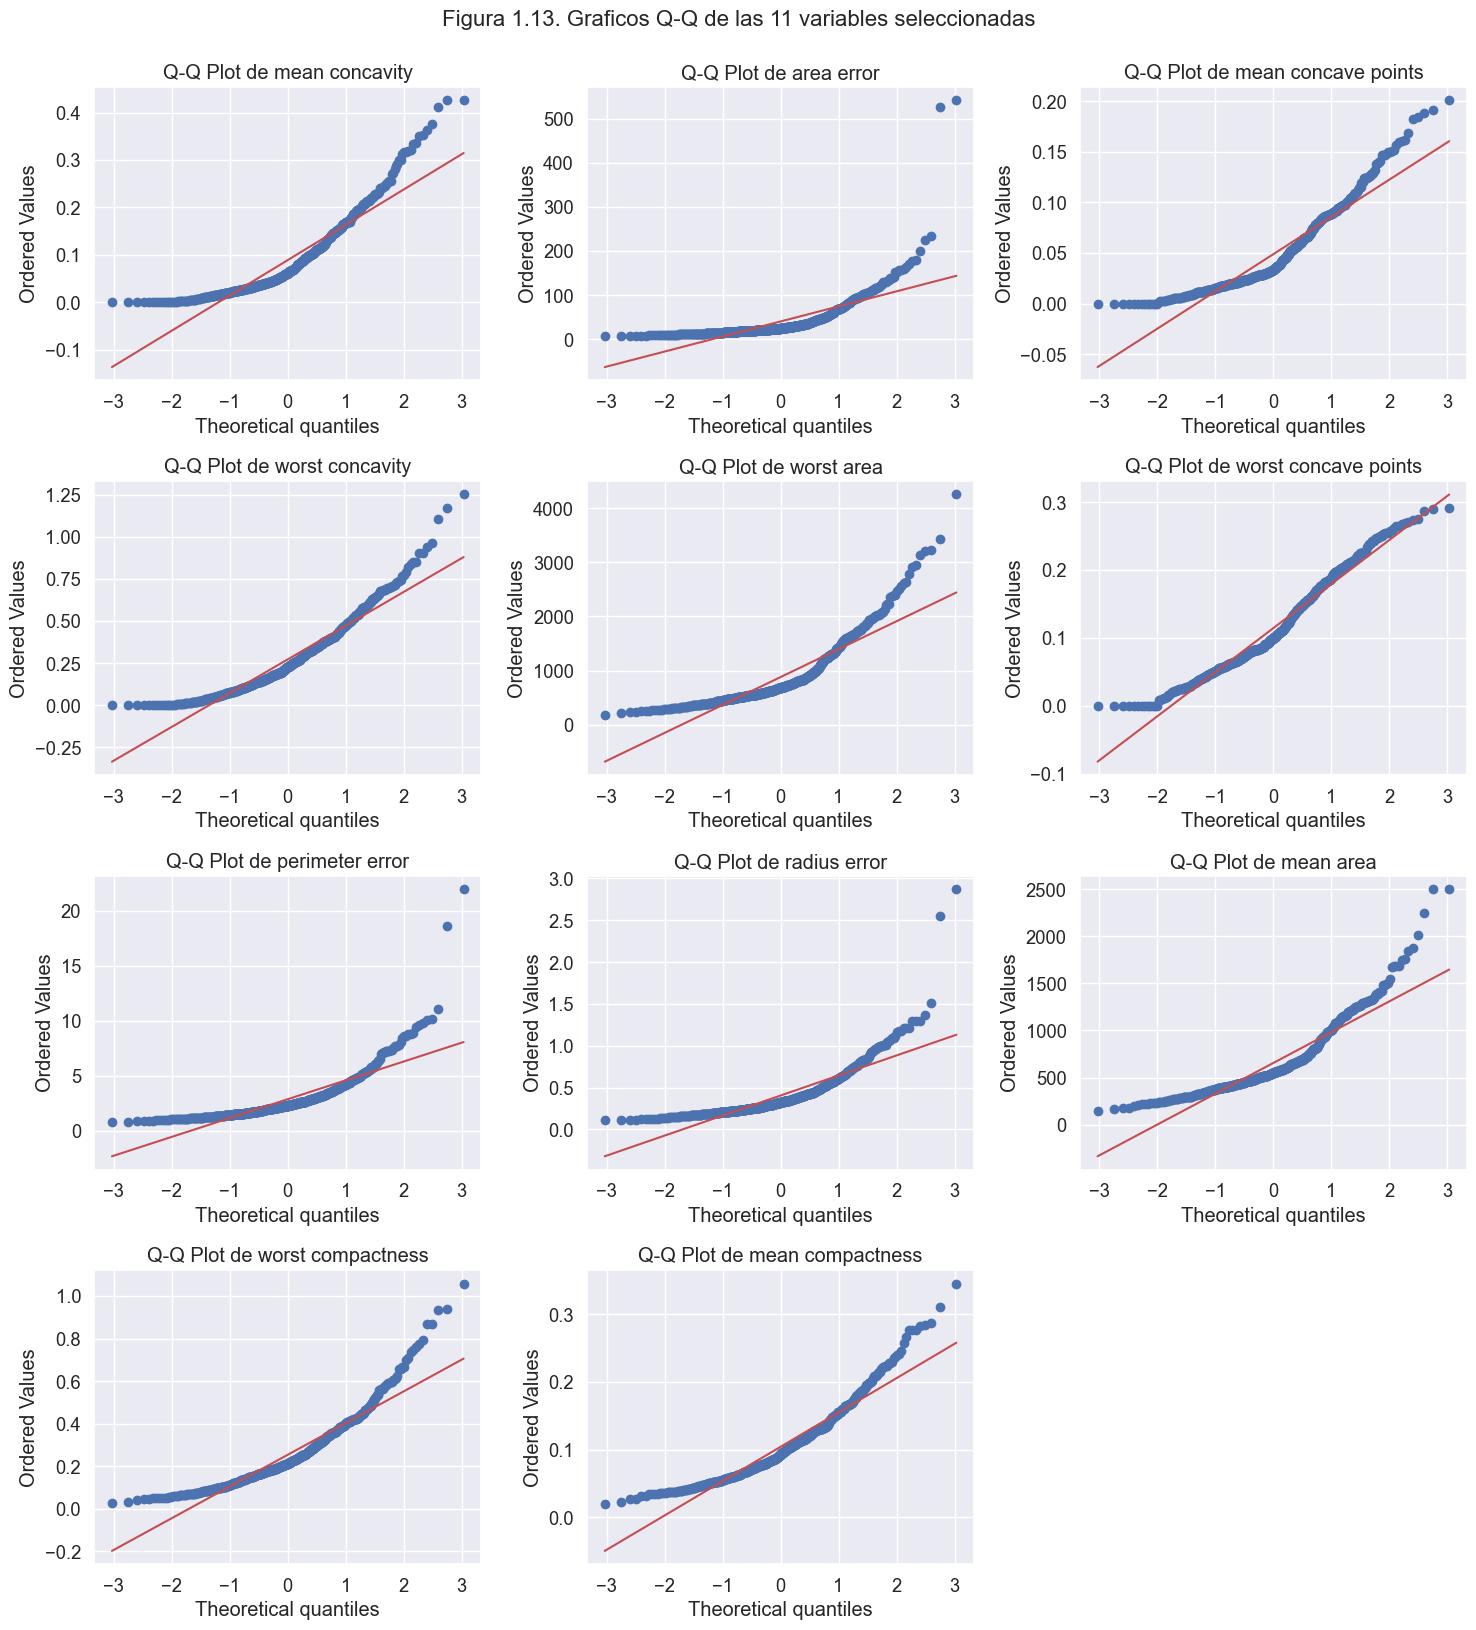

In [19]:
n_features = len(top11_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

for i, feature in enumerate(top11_features):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col] if n_rows > 1 else axes[col]
    stats.probplot(X[feature], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot de {feature}')

# Si sobran celdas vacías, eliminarlas
for j in range(i+1, n_rows * n_cols):
    row = j // n_cols
    col = j % n_cols
    fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

plt.tight_layout()

# Añadimos un título principal para toda la figura
plt.suptitle('Figura 1.13. Graficos Q-Q de las 11 variables seleccionadas', fontsize=16, y=1.02)

plt.savefig(f'{output_dir}/visualizacion_qq_top11.png', dpi=100, bbox_inches='tight')
plt.show()



Finalmente, calculamos y analizamos los coeficientes de asimetría y curtosis para todas las variables. la asimetría (skewness) cuantifica el grado y dirección de la desviación de la simetría de una distribución, mientras que la curtosis mide la concentración de valores en las colas en comparación con una distribución normal. Estos indicadores nos ayudarán a determinar qué transformaciones podrían ser apropiadas durante la fase de preprocesamiento ya que aunque la prueba de Shapiro-Wilk nos da p-valores muy bajos, y se confirma la no normalidad con los gráficos Q-Q, la **Tabla 1.9** demuestra que podríamos considerar que algunas, sobre todo desde ```worst concavity``` en adelante, puden considerarse _sufucientemente normales_ (dos últimas gráficas de la **Figura 1.14**) para algunas transformaciones.  

In [20]:
# Analizamos la asimetría y curtosis de las características
skew_kurt = pd.DataFrame({
    'asimetría': X.skew(),
    'curtosis': X.kurtosis()
})

print("\nTabla 1.9. Asimetría y curtosis de las características:")
display(skew_kurt.sort_values('asimetría', ascending=False))


Tabla 1.9. Asimetría y curtosis de las características:


asimetría   curtosis
area error                5.447186  49.209077
concavity error           5.110463  48.861395
fractal dimension error   3.923969  26.280847
perimeter error           3.443615  21.401905
radius error              3.088612  17.686726
smoothness error          2.314450  10.469840
symmetry error            2.195133   7.896130
compactness error         1.902221   5.106252
worst area                1.859373   4.396395
worst fractal dimension   1.662579   5.244611
texture error             1.646444   5.349169
mean area                 1.645732   3.652303
worst compactness         1.473555   3.039288
concave points error      1.444678   5.126302
worst symmetry            1.433928   4.444560
mean concavity            1.401180   1.998638
mean fractal dimension    1.304489   3.005892
mean compactness          1.190123   1.650130
mean concave points       1.171180   1.066556
worst concavity           1.150237   1.615253
worst perimeter           1.128164   1.070150
worst radius              1.103115   0.944090
mean perimeter            0.990650   0.972214
mean radius               0.942380   0.845522
mean symmetry             0.725609   1.287933
mean texture              0.650450   0.758319
worst texture             0.498321   0.224302
worst concave points      0.492616  -0.535535
mean smoothness           0.456324   0.855975
worst smoothness          0.415426   0.517825

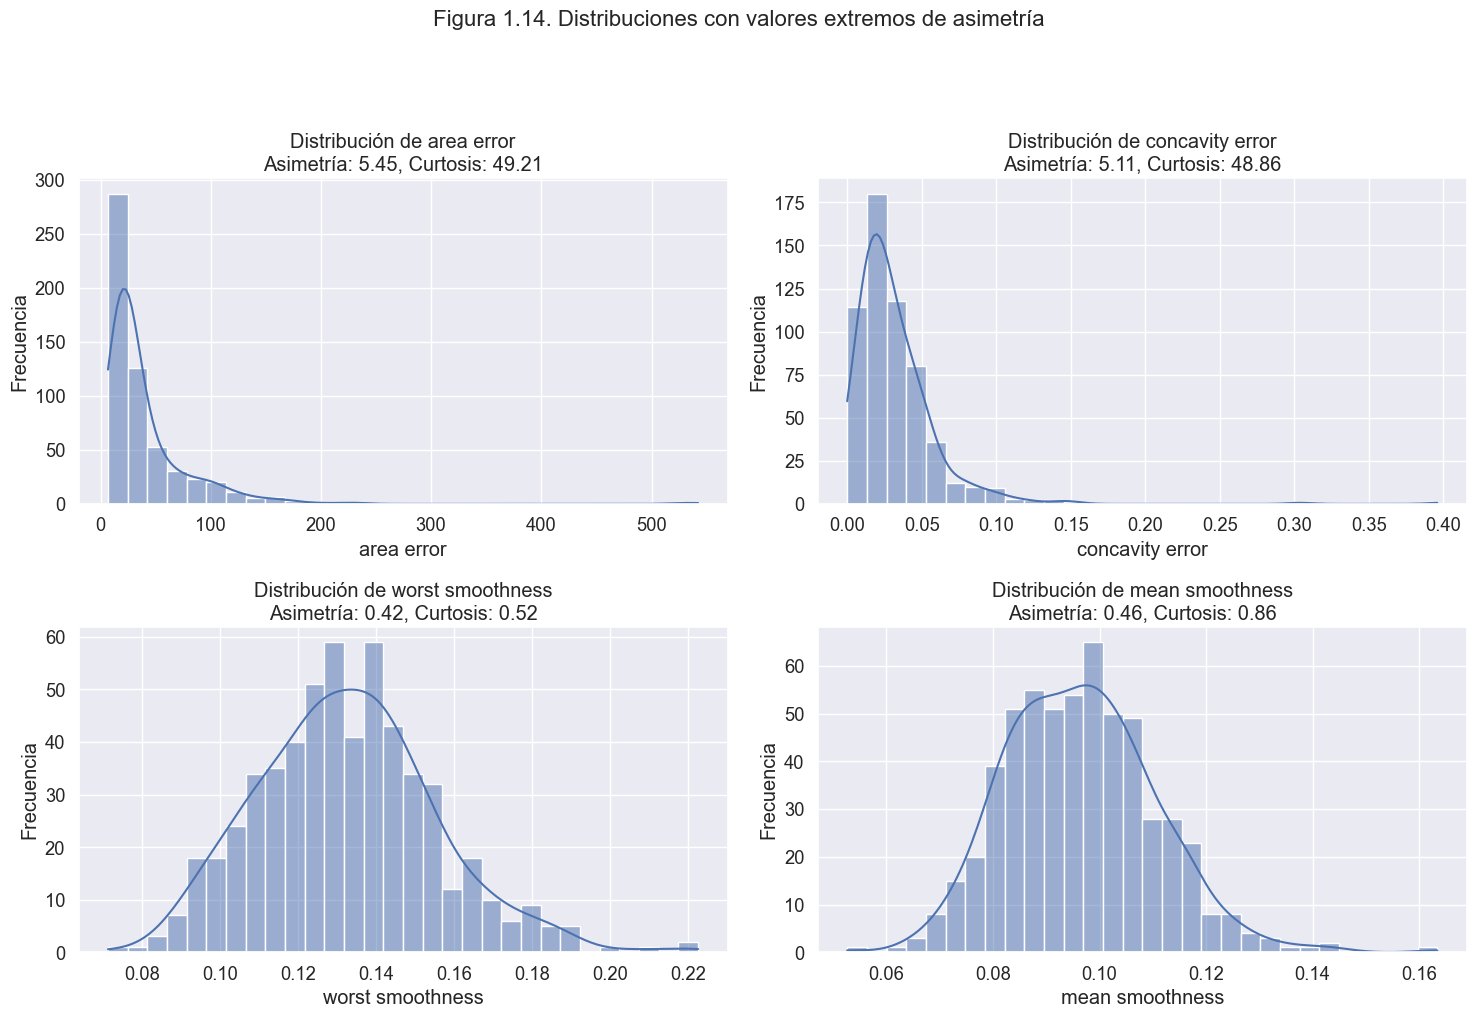

In [21]:
# Seleccionamos variables con asimetría extrema
max_skew_features = skew_kurt.sort_values('asimetría', ascending=False).head(2).index.tolist()
min_skew_features = skew_kurt.sort_values('asimetría', ascending=True).head(2).index.tolist()
extreme_skew_features = max_skew_features + min_skew_features

# Visualizamos histogramas de variables con asimetría extrema
plt.figure(figsize=(15, 10))
for i, feature in enumerate(extreme_skew_features):
    skewness = skew_kurt.loc[feature, 'asimetría']
    kurtosis = skew_kurt.loc[feature, 'curtosis']
    
    plt.subplot(2, 2, i+1)
    sns.histplot(X[feature], kde=True, bins=30)
    plt.title(f'Distribución de {feature}\nAsimetría: {skewness:.2f}, Curtosis: {kurtosis:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.suptitle('Figura 1.14. Distribuciones con valores extremos de asimetría', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{output_dir}/histogramas_asimetria_extrema.png', dpi=100, bbox_inches='tight')
plt.show()

## <font color="#000000"> 1.7 Conclusiones del análisis exploratorio</font><a id="section17"></a>

1. **Distribución de clases**: El conjunto de datos presenta un desequilibrio moderado, con 62.74% de tumores benignos y 37.26% malignos, lo que deberá considerarse en la evaluación de los modelos.

2. **Poder discriminativo de variables**: Las características que muestran una mayor diferencia relativa entre clases son "mean concavity" (1.109), "area error" (1.099) y "mean concave points" (1.095) las más discriminativas.

3. **Patrón de valores por clase**: Los tumores malignos presentan valores más elevados en la mayoría de las características, especialmente en aquellas relacionadas con tamaño (área, radio y perímetro) y forma (concavidad, compacidad).

4. **Correlaciones**: Existe alta correlación entre múltiples características, particularmente entre las medidas de tamaño (radio, perímetro, área) y entre diferentes versiones de la misma medida (mean, worst). Esta multicolinealidad deberá considerarse en la selección de variables.

5. **Valores atípicos**: Se identificaron valores atípicos en varias características, siendo "area error" la que tiene un número mayor (65 según IQR global, pero solo 20 al analizar por clase). La diferencia entre outliers globales y por clase indica que muchos valores considerados atípicos globalmente son normales dentro de su clase.

6. **Normalidad**: Todas las características rechazan la hipótesis de normalidad según la prueba de Shapiro-Wilk (p<0.05). Sin embargo, algunas variables como "worst smoothness", "mean smoothness" y otras muestran distribuciones visualmente cercanas a la normal.

7. **Asimetría y curtosis**: casi dostercios de las varibles tienen una asimetría positiva importante (>1.0), siendo extrema en "area error" (5.45) y "concavity error" (5.11). Los valores de curtosis son elevados, especialmente en estas mismas variables (>48), indicando distribuciones con colas pesadas.

Estas características del conjunto de datos sugieren la idoneidad de algoritmos como Random Forest, Extra Trees y Bagging, que son robustos ante distribuciones no normales, outliers y variables correlacionadas, mientras que métodos paramétricos requerirían transformaciones previas.